###############################################################################################################################

## Predicting Root Cause by Implementing Supervised Mechine Learning Classifier




 ---------------------------


------------------------------------

###############################################################################################################################

#### 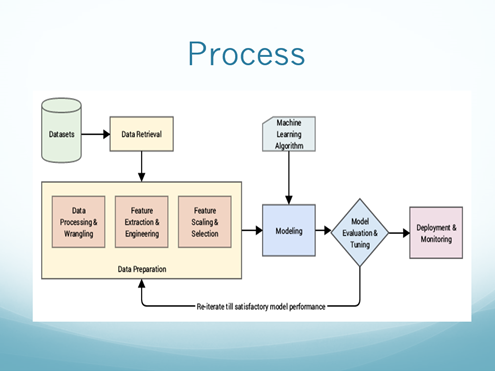

## 1. Introduction
###############################################################################################################################

### 1.1. Problem Statement

## 2. DATA COLLECTION

###############################################################################################################################

### 2.1. Connect to dataset

In [1]:
# SETTING UP WORKING DIRECTORY
import os
os.getcwd()
os.chdir(r'C:\Users\sara.khosravi\Documents\Sara\Machine Lerning\Data')
os.getcwd()

'C:\\Users\\sara.khosravi\\Documents\\Sara\\Machine Lerning\\Data'

In [2]:
# IMPORTING PACKAGES AND LIBRARIES
import warnings
warnings.filterwarnings('ignore')

#import libraries for the data-structures
#Importing the numpy and pandas package
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import sys
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling

#EDA Package
!pip install sweetviz
import sweetviz as sv

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
!pip3 install plotly
import plotly
import plotly.figure_factory as ff

##import libraries for date
from datetime import datetime
from matplotlib import dates
from datetime import datetime
import time

#import libraries for math
import statsmodels.api as sm
from scipy.stats import norm
import math

#import libraries for model tuning modeling
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

#import libraries for modeling
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingRegressor
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

print('Libraries imported and installed.')

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Libraries imported and installed.


### 2.2. combine the datasets

In [3]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]


In [4]:
#Read files:

# READING THE DATA

#Row data Last 6 Months file
dfnct = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Machine Lerning\Data\NCT-Data-outputML.xlsx',na_values=missing_value_formats)

#Row data Last 6 Months file 
dfimt = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Machine Lerning\Data\IMT-Data-outputML.xlsx',na_values=missing_value_formats)

#Row data Last 6 Months file
dfnctc = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Machine Lerning\Data\NCT-Correlated-outputML.xlsx',na_values=missing_value_formats)

#Row data Last 6 Months file
dfimtc = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Machine Lerning\Data\IMT-Correlated-outputML.xlsx',na_values=missing_value_formats)

print('NCT Data:\n', dfnct.shape)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('IMT Data:\n', dfimt.shape)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('NCT Correlated Data:\n', dfnctc.shape)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('IMT Correlated Data:\n', dfimtc.shape)

NCT Data:
 (4601, 11)
-----------------------------------------------------------------------------------------------------------------

IMT Data:
 (2571, 18)
-----------------------------------------------------------------------------------------------------------------

NCT Correlated Data:
 (308753, 12)
-----------------------------------------------------------------------------------------------------------------

IMT Correlated Data:
 (167782, 17)


In [5]:
# UNDERSTANDING THE DATASET
dfnct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Nct Id                     4601 non-null   object        
 1   Associated Id              2167 non-null   object        
 2   Platform                   3881 non-null   object        
 3   Element                    4578 non-null   object        
 4   Network Impact             3881 non-null   object        
 5   Service Impact             3881 non-null   object        
 6   Site                       4511 non-null   object        
 7   Status                     4601 non-null   object        
 8   Network Impact Adjustment  4601 non-null   float64       
 9   Window Start Date Time     3871 non-null   datetime64[ns]
 10  Window End Date Time       3871 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 395.5+ KB


In [6]:
# UNDERSTANDING THE DATASET
dfimt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Imt Id            2571 non-null   object        
 1   Associated Id     2506 non-null   object        
 2   Element           393 non-null    object        
 3   Site Id           2213 non-null   object        
 4   Resolution        2393 non-null   object        
 5   Headline          2571 non-null   object        
 6   Netcool Id        2090 non-null   object        
 7   Network Impact    2571 non-null   object        
 8   Service Impact    2571 non-null   object        
 9   Status            2571 non-null   object        
 10  Platform          2571 non-null   object        
 11  Recovery Prime    1864 non-null   object        
 12  Rule Name         2081 non-null   object        
 13  Network Impact.1  2571 non-null   object        
 14  Netcool Id.1      2090 n

In [7]:
# UNDERSTANDING THE DATASET
dfnctc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308753 entries, 0 to 308752
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Com Network Element Id  308684 non-null  object 
 1   Associated Id           170997 non-null  object 
 2   Duration                23109 non-null   float64
 3   Element                 308331 non-null  object 
 4   Element Type            307137 non-null  object 
 5   Network Impact          308684 non-null  float64
 6   Region                  298523 non-null  object 
 7   Service Impact          306520 non-null  float64
 8   Service Impacted        251691 non-null  object 
 9   Severity                306677 non-null  object 
 10  Site                    305866 non-null  object 
 11  Site Id                 307688 non-null  object 
dtypes: float64(3), object(9)
memory usage: 28.3+ MB


In [8]:
# UNDERSTANDING THE DATASET
dfimtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167782 entries, 0 to 167781
Data columns (total 17 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Start Date                                 162471 non-null  datetime64[ns]
 1   Com Network Element Id                     162809 non-null  object        
 2   Associated Id                              166132 non-null  object        
 3   Service Impact                             162809 non-null  float64       
 4   Network Impact                             107618 non-null  float64       
 5   Duration                                   0 non-null       float64       
 6   Severity                                   162468 non-null  object        
 7   Site                                       104842 non-null  object        
 8   Site Id                                    162723 non-null  object        
 9   Elem

In [9]:
# UNDERSTANDING THE DATASET
dfnct

,Nct Id,Associated Id,Platform,Element,Network Impact,Service Impact,Site,Status,Network Impact Adjustment,Window Start Date Time,Window End Date Time
0,NCT.2205.006443,NaN,Transport,-,None,None,DUPONT,Closed,0.0,2022-05-11 08:00:00,2022-05-11 19:00:00
1,NCT.2205.006470,NaN,Radio,CSD-C3665-01,None,None,DUFFERIN & OVERBROOK,Closed,0.0,2022-05-12 08:00:00,2022-05-12 23:00:00
2,NCT.2205.006470,NaN,Radio,MW-C3665-01,None,None,DUFFERIN & OVERBROOK,Closed,0.0,2022-05-12 08:00:00,2022-05-12 23:00:00
3,NCT.2205.006470,NaN,Radio,PWR-C3665-01,None,None,DUFFERIN & OVERBROOK,Closed,0.0,2022-05-12 08:00:00,2022-05-12 23:00:00
4,NCT.2205.006470,NaN,Radio,T57MP01X,None,None,DUFFERIN & OVERBROOK,Closed,0.0,2022-05-12 08:00:00,2022-05-12 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4596,NCT.2205.016338,WOT5442393,Facilities,TLAN-W5435-02,Threatened,None,RED DEER CENTRAL,Authorized,0.2,2022-05-27 10:00:00,2022-05-27 20:00:00
4597,NCT.2205.016350,CHG005082323,Video,Comcast,None,None,NATIONAL WN,Closed,0.0,2022-05-24 20:40:33,2022-05-24 21:40:33
4598,NCT.2205.016350,NaN,Video,Comcast,None,None,NATIONAL WN,Closed,0.0,2022-05-24 20:40:33,2022-05-24 21:40:33
4599,NCT.2205.016362,CHG005080818,Video,Comcast,None,None,NATIONAL WN,Closed,0.0,2022-05-24 16:30:00,2022-05-24 23:55:00


In [10]:
# UNDERSTANDING THE DATASET
dfimt

,Imt Id,Associated Id,Element,Site Id,Resolution,Headline,Netcool Id,Network Impact,Service Impact,Status,Platform,Recovery Prime,Rule Name,Network Impact.1,Netcool Id.1,Platform.1,Root Cause,Incident Start
0,IMT.2205.012621,AUTO.9772033,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,Data and Voice Services,NaN,BMC - TSP - Parameter Application Collection S...,None,AUTO.9772033,Data and Voice Services,Cause Identified,2022-05-11 00:06:12
1,IMT.2205.012621,IMT.2205.012681,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,Data and Voice Services,NaN,BMC - TSP - Parameter Application Collection S...,None,AUTO.9772033,Data and Voice Services,Cause Identified,2022-05-11 00:06:12
2,IMT.2205.012683,AUTO.9772006,NaN,---,See Linked ticket,NCT.2205.006177 - ml02ex420003,AUTO.9772006,Threatened,None,Closed,Core Data,TAC Resolved,RCWIN Core - Unreachable,Threatened,AUTO.9772006,Core Data,Change Management Activity,2022-05-11 00:10:00
3,IMT.2205.012683,NCT.2205.006177,NaN,---,See Linked ticket,NCT.2205.006177 - ml02ex420003,AUTO.9772006,Threatened,None,Closed,Core Data,TAC Resolved,RCWIN Core - Unreachable,Threatened,AUTO.9772006,Core Data,Change Management Activity,2022-05-11 00:10:00
4,IMT.2205.012688,AUTO.9772075,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02ldapp...,AUTO.9772075,None,None,Closed,Data and Voice Services,NaN,BMC - LDAP Wireless Critical,None,AUTO.9772075,Data and Voice Services,Cause Identified,2022-05-11 00:08:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,IMT.2205.038157,PT0043706,ADITYA062,NaN,NaN,Calls to Toll Free 855-275-2218 via D20 switch...,NaN,None,None,In Progress,Data and Voice Services,NaN,NaN,None,NaN,Data and Voice Services,NaN,2022-05-24 20:10:59
2567,IMT.2205.038195,AUTO.9876781,NaN,E5400,See Linked ticket,E5400 ( LAC ST-AUGUSTIN ) - Q77C01X - NE=QC_Ca...,AUTO.9876781,None,None,Closed,Radio,NOC Resolved,Ericsson LTE_Inter Node Feature Incompatibilit...,None,AUTO.9876781,Radio,Software Failure,2022-05-24 20:33:27
2568,IMT.2205.038195,IMT.2205.016062,NaN,E5400,See Linked ticket,E5400 ( LAC ST-AUGUSTIN ) - Q77C01X - NE=QC_Ca...,AUTO.9876781,None,None,Closed,Radio,NOC Resolved,Ericsson LTE_Inter Node Feature Incompatibilit...,None,AUTO.9876781,Radio,Software Failure,2022-05-24 20:33:27
2569,IMT.2205.038247,C239814008500,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,Wireline Access,Field Resolved,NaN,Degraded,NaN,Wireline Access,Damage Network,2022-05-24 22:42:11


In [11]:
# UNDERSTANDING THE DATASET
dfnctc

,Com Network Element Id,Associated Id,Duration,Element,Element Type,Network Impact,Region,Service Impact,Service Impacted,Severity,Site,Site Id
0,CNE000031458950,NaN,NaN,CH3000-PL01-R402B-S40,HFC HUB,0.0,ONT,0.0,OPTICAL TRANSPORT,Minor,LONDON PL01,PL01
1,CNE000031458951,NaN,NaN,CH3000-PL01-R402B-S36,HFC HUB,0.0,ONT,0.0,OPTICAL TRANSPORT,Minor,LONDON PL01,PL01
2,CNE000031458952,NaN,NaN,CH3000-PL01-R403B-S40,HFC HUB,0.0,ONT,0.0,OPTICAL TRANSPORT,Minor,LONDON PL01,PL01
3,CNE000031458953,NaN,NaN,CH3000-PL01-R403B-S36,HFC HUB,0.0,ONT,0.0,OPTICAL TRANSPORT,Minor,LONDON PL01,PL01
4,CNE000031458954,NaN,NaN,CH3000-PL01-R303-S18,HFC HUB,0.0,ONT,0.0,OPTICAL TRANSPORT,Minor,LONDON PL01,PL01
...,...,...,...,...,...,...,...,...,...,...,...,...
308748,NaN,NPT000000190457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308749,NaN,NPT000000190460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308750,NaN,WOMS00001006856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308751,NaN,WOT5441818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# UNDERSTANDING THE DATASET
dfimtc

,Start Date,Com Network Element Id,Associated Id,Service Impact,Network Impact,Duration,Severity,Site,Site Id,Element,Element Type,Element Sub Type,Region,Service Impacted,End Date,Days Between Networkelement Start and End,Duration of Networkelement
0,2021-01-26 02:06:52,CNE000031651375,AUTO.9815809,0.0,NaN,NaN,Minor,NaN,---,ldccc14d01,---,NaN,NaN,NaN,2022-05-17 04:29:11,476.098831,"476 days, 2 Hrs, 22 Minutes"
1,2021-01-26 02:06:52,CNE000031651375,IMT.2205.023253,0.0,NaN,NaN,Minor,NaN,---,ldccc14d01,---,NaN,NaN,NaN,2022-05-17 04:29:11,476.098831,"476 days, 2 Hrs, 22 Minutes"
2,2021-01-26 02:06:52,CNE000031651375,IMT.2205.023254,0.0,NaN,NaN,Minor,NaN,---,ldccc14d01,---,NaN,NaN,NaN,2022-05-17 04:29:11,476.098831,"476 days, 2 Hrs, 22 Minutes"
3,2021-01-26 02:06:52,CNE000031651375,IMT.2205.023255,0.0,NaN,NaN,Minor,NaN,---,ldccc14d01,---,NaN,NaN,NaN,2022-05-17 04:29:11,476.098831,"476 days, 2 Hrs, 22 Minutes"
4,2021-01-26 02:06:52,CNE000031651375,IMT.2205.023269,0.0,NaN,NaN,Minor,NaN,---,ldccc14d01,---,NaN,NaN,NaN,2022-05-17 04:29:11,476.098831,"476 days, 2 Hrs, 22 Minutes"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167777,NaT,NaN,PT01204771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
167778,NaT,NaN,PT01204772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
167779,NaT,NaN,PT01204801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
167780,NaT,NaN,SNR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [13]:
# MAPPING 

dfimtimtc= dfimt.join(dfimtc.set_index('Element'), on='Element', how='left', lsuffix='_left', rsuffix='_right')
dfimtimtc.shape


(10875496, 34)

In [14]:
# MAPPING 

dfnctnctc= dfnct.join(dfnctc.set_index('Element'), on='Element', how='left', lsuffix='_left', rsuffix='_right')
dfnctnctc.shape

(176830, 22)

In [15]:
#dfnct['Element'] = dfnct['Element'].astype(np.uint8)
#dfimtimtc['Element'] = dfimtimtc['Element'].astype(np.uint8)

In [16]:

df= dfimt.join(dfnct.set_index('Element'), on='Element', how='left', lsuffix='_left', rsuffix='_right')
df.shape

(50489, 28)

In [17]:
df

,Imt Id,Associated Id_left,Element,Site Id,Resolution,Headline,Netcool Id,Network Impact_left,Service Impact_left,Status_left,...,Nct Id,Associated Id_right,Platform_right,Network Impact_right,Service Impact_right,Site,Status_right,Network Impact Adjustment,Window Start Date Time,Window End Date Time
0,IMT.2205.012621,AUTO.9772033,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,NCT.2205.006487,NaN,NaN,NaN,NaN,NaN,Closed,0.0,NaT,NaT
0,IMT.2205.012621,AUTO.9772033,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,NCT.2205.006595,NaN,NaN,NaN,NaN,NaN,Draft,0.0,NaT,NaT
0,IMT.2205.012621,AUTO.9772033,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,NCT.2205.006835,NaN,NaN,NaN,NaN,NaN,Closed,0.0,NaT,NaT
0,IMT.2205.012621,AUTO.9772033,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,NCT.2205.009569,NaN,NaN,NaN,NaN,NaN,Draft,0.0,NaT,NaT
0,IMT.2205.012621,AUTO.9772033,NaN,NaN,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,NCT.2205.009987,NaN,Radio,Outage,Outage,NaN,Draft,0.0,2022-05-13 07:00:00,2022-05-13 23:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,IMT.2205.038247,PT01204971,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.014689,NaN,Radio,None,None,NaN,Closed,0.0,2022-01-26 00:00:00,2022-01-26 06:00:00
2570,IMT.2205.038247,PT01204971,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.014918,NaN,Core Data,Degraded,None,NaN,Draft,3.0,2022-06-03 00:00:00,2022-06-03 06:00:00
2570,IMT.2205.038247,PT01204971,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.014920,NaN,Core Data,Degraded,None,NaN,Draft,3.0,2022-06-15 00:00:00,2022-06-15 06:00:00
2570,IMT.2205.038247,PT01204971,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.015564,NPT000000190448,Core Data,None,None,NaN,Draft,0.0,2022-05-26 08:00:00,2022-05-26 16:00:00


In [18]:
data= df

### 2.3. Find the top 10 records

In [19]:
#getting number of rows(obs)
data.shape[0]

50489

In [20]:
#getting number of collumns
data.shape[1]

28

In [21]:
#df2=df #copy by refrences
# getting copy of data ( copy by value)
#method1:
data_orginal=data.copy()
#method2:
data_orginal2=data[:]

In [22]:
data=data.iloc[:18536735, :]
data.shape

(50489, 28)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50489 entries, 0 to 2570
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Imt Id                     50489 non-null  object        
 1   Associated Id_left         49192 non-null  object        
 2   Element                    395 non-null    object        
 3   Site Id                    42321 non-null  object        
 4   Resolution                 46571 non-null  object        
 5   Headline                   50489 non-null  object        
 6   Netcool Id                 47872 non-null  object        
 7   Network Impact_left        50489 non-null  object        
 8   Service Impact_left        50489 non-null  object        
 9   Status_left                50489 non-null  object        
 10  Platform_left              50489 non-null  object        
 11  Recovery Prime             34866 non-null  object        
 12  Rule 

In [24]:
#making a copy of data before preprocessing
data_raw=data.copy()

### 2.4. Describe Dataset

In [25]:
data.describe()

,Network Impact Adjustment
count,50099.000000
mean,0.260963
std,0.845354
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


=======================================================================================================================

# ---------------------------------------------  PART ONE   ----------------------------------------------

========================================================================================================================

# 3. Data Preprocessing

###############################################################################################################################



## ''''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step One '''''''''''''''''''''''''''''''''''''''''''''''''''

## ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## 4. Data Exploration Analyasis Step " ONE"

###############################################################################################################################

### 4.1. Handling Duplicate Data

#### 4.1.1. Handling Duplicate Observation

In [26]:
data=data.drop_duplicates()

### 4.2. Handling Missing Values

#### 4.2.1. Sorting Data by Date

###### --Sort by date help us to filling missing value reasnable

In [27]:
data.sort_values(by="Incident Start" , ascending=True)

,Imt Id,Associated Id_left,Element,Site Id,Resolution,Headline,Netcool Id,Network Impact_left,Service Impact_left,Status_left,...,Nct Id,Associated Id_right,Platform_right,Network Impact_right,Service Impact_right,Site,Status_right,Network Impact Adjustment,Window Start Date Time,Window End Date Time
278,IMT.2205.016601,AUTO.9784081,NaN,PONK1,Network / Service Validated,PONK1 ( NEWKIRK ) - CH3000-PONK1-R1301-S38 - C...,AUTO.9784081,None,None,Closed,...,NCT.2205.015564,NPT000000190448,Core Data,None,None,NaN,Draft,0.0,2022-05-26 08:00:00,2022-05-26 16:00:00
278,IMT.2205.016601,AUTO.9784081,NaN,PONK1,Network / Service Validated,PONK1 ( NEWKIRK ) - CH3000-PONK1-R1301-S38 - C...,AUTO.9784081,None,None,Closed,...,NCT.2205.016105,NaN,NaN,NaN,NaN,NaN,Draft,0.0,NaT,NaT
278,IMT.2205.016601,AUTO.9784081,NaN,PONK1,Network / Service Validated,PONK1 ( NEWKIRK ) - CH3000-PONK1-R1301-S38 - C...,AUTO.9784081,None,None,Closed,...,NCT.2205.014920,NaN,Core Data,Degraded,None,NaN,Draft,3.0,2022-06-15 00:00:00,2022-06-15 06:00:00
278,IMT.2205.016601,AUTO.9784081,NaN,PONK1,Network / Service Validated,PONK1 ( NEWKIRK ) - CH3000-PONK1-R1301-S38 - C...,AUTO.9784081,None,None,Closed,...,NCT.2205.014918,NaN,Core Data,Degraded,None,NaN,Draft,3.0,2022-06-03 00:00:00,2022-06-03 06:00:00
278,IMT.2205.016601,AUTO.9784081,NaN,PONK1,Network / Service Validated,PONK1 ( NEWKIRK ) - CH3000-PONK1-R1301-S38 - C...,AUTO.9784081,None,None,Closed,...,NCT.2205.014689,NaN,Radio,None,None,NaN,Closed,0.0,2022-01-26 00:00:00,2022-01-26 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,IMT.2205.038247,C239814008500,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.014582,NaN,NaN,NaN,NaN,NaN,Closed,0.0,NaT,NaT
2569,IMT.2205.038247,C239814008500,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.014689,NaN,Radio,None,None,NaN,Closed,0.0,2022-01-26 00:00:00,2022-01-26 06:00:00
2569,IMT.2205.038247,C239814008500,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.014918,NaN,Core Data,Degraded,None,NaN,Draft,3.0,2022-06-03 00:00:00,2022-06-03 06:00:00
2569,IMT.2205.038247,C239814008500,NaN,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,NaN,Degraded,Degraded,Closed,...,NCT.2205.011866,D220013,Core Data,None,None,NaN,Draft,0.0,2022-05-19 07:00:00,2022-05-19 15:00:00


#### 4.2.2.  Finding the Missing values

In [28]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  data1=data[data.columns[data.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = data1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((data1.isnull().sum()/data1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [29]:
percentage_of_miss()

,Number of Missing,Percentage
Site,50484,99.990097
Element,50094,99.217651
Associated Id_right,43951,87.050645
Window End Date Time,28704,56.851988
Window Start Date Time,28704,56.851988
Platform_right,28704,56.851988
Network Impact_right,28704,56.851988
Service Impact_right,28704,56.851988
Recovery Prime,15623,30.943374
Site Id,8168,16.177781


#### 4.2.3. Drop columns that have 80% or more missing values

In [30]:
df.shape

(50489, 28)

In [31]:
df = data.dropna(axis=1, thresh=15756224)

### 4.3. Filling Missing Values

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50489 entries, 0 to 2570
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Imt Id                     50489 non-null  object        
 1   Associated Id_left         49192 non-null  object        
 2   Element                    395 non-null    object        
 3   Site Id                    42321 non-null  object        
 4   Resolution                 46571 non-null  object        
 5   Headline                   50489 non-null  object        
 6   Netcool Id                 47872 non-null  object        
 7   Network Impact_left        50489 non-null  object        
 8   Service Impact_left        50489 non-null  object        
 9   Status_left                50489 non-null  object        
 10  Platform_left              50489 non-null  object        
 11  Recovery Prime             34866 non-null  object        
 12  Rule 

In [33]:
df=data

In [34]:
#*************************************************************************************************************************
df['Nct Id'] = df['Nct Id'].fillna("Unknown") 
df['Associated Id_left'] = df['Associated Id_left'].fillna("Unknown") 
df['Platform_left'] = df['Platform_left'].fillna("Unknown") 
df['Element'] = df['Element'].fillna("Unknown")
df['Network Impact_left'] = df['Network Impact_left'].fillna("Unknown")
df['Site'] = df['Site'].fillna("Unknown") 
df['Status_left'] = df['Status_left'].fillna("Unknown")
df['Network Impact Adjustment'] = df['Network Impact Adjustment'].fillna("Unknown")
df['Window Start Date Time'] = df['Window Start Date Time'].fillna(" ")
df['Window End Date Time'] = df['Window End Date Time'].fillna(" ")
#df['Site Id'] = df['Site Id'].fillna("Unknown")
#df['Prime Element'] = df['Prime Element'].fillna("Unknown")
#df['Network Impact'] = df['Network Impact'].fillna("Unknown")
#df['Severity_left'] = df['Severity_left'].fillna("Unknown")
#*************************************************************************************************************************
df['Imt Id'] = df['Imt Id'].fillna("Unknown") 
df['Associated Id_right'] = df['Associated Id_right'].fillna("Unknown") 
df['Site Id'] = df['Site Id'].fillna("Unknown") 
df['Resolution'] = df['Resolution'].fillna("Unknown") 
df['Headline'] = df['Headline'].fillna("Unknown") 
df['Netcool Id'] = df['Netcool Id'].fillna("Unknown")
df['Network Impact_right'] = df['Network Impact_right'].fillna("Unknown")
df['Service Impact_right'] = df['Service Impact_right'].fillna("Unknown")
df['Status_right'] = df['Status_right'].fillna("Unknown")
df['Platform_right'] = df['Platform_right'].fillna("Unknown")
df['Recovery Prime'] = df['Recovery Prime'].fillna("Unknown")
df['Rule Name'] = df['Rule Name'].fillna("Unknown")
df['Network Impact.1'] = df['Network Impact.1'].fillna("Unknown") 
df['Platform.1'] = df['Platform.1'].fillna(" ")
df['Root Cause'] = df['Root Cause'].fillna("Unknown")
df['Netcool Id'] = df['Netcool Id'].fillna("Unknown")
df['Incident Start'] = df['Incident Start'].fillna("0")
#df['Event Source'] = df['Event Source'].fillna("Unknown")
#df['Severity_right'] = df['Severity_right'].fillna("Unknown")

#*************************************************************************************************************************
#df['Com Network Element Id'] = df['Com Network Element Id'].fillna("Unknown") 
#df['Network Impact_right'] = df['Network Impact_right'].fillna("Unknown") 
#df['Site_right'] = df['Site_right'].fillna("Unknown") 
#df['Site Id_right'] = df['Site Id_right'].fillna("Unknown") 
#df['Element Type'] = df['Element Type'].fillna("Unknown") 
#df['Region'] = df['Region'].fillna("Unknown") 
#df['Service Impacted'] = df['Service Impacted'].fillna("Unknown") 
#df['End Date'] = df['End Date'].fillna(" ") 
#df['Duration of Networkelement'] = df['Duration of Networkelement'].fillna(" ") 
#*************************************************************************************************************************

In [35]:
# REVIEWING MISSING VALUES IN CORE DATASET - IMT
df.apply(lambda X:sum(X.isnull()))

Imt Id                          0
Associated Id_left              0
Element                         0
Site Id                         0
Resolution                      0
Headline                        0
Netcool Id                      0
Network Impact_left             0
Service Impact_left             0
Status_left                     0
Platform_left                   0
Recovery Prime                  0
Rule Name                       0
Network Impact.1                0
Netcool Id.1                 2617
Platform.1                      0
Root Cause                      0
Incident Start                  0
Nct Id                          0
Associated Id_right             0
Platform_right                  0
Network Impact_right            0
Service Impact_right            0
Site                            0
Status_right                    0
Network Impact Adjustment       0
Window Start Date Time          0
Window End Date Time            0
dtype: int64

### Rename Column

In [36]:
df.rename(columns={  'Nct Id':'NctId',
                     'Associated Id_left':'AssociatedIdLeft',
                     'Platform_left':'PlatformLeft',
                     'Network Impact_left':'NetworkImpactLeft',
                     'Service Impact_left':'ServiceImpactLeft',
                     'Status_left':'StatusLeft',
                     'Network Impact Adjustment':'NetworkImpactAdjustment',
                     'Window Start Date Time':'WindowStartDateTime',
                     'Window End Date Time':'WindowEndDateTime',
                     'Imt Id':'ImtId',
                     'Associated Id_right':'AssociatedIdRight',
                     #'Site Id_left':'SiteIdLeft',
                     'Netcool Id':'NetcoolId',
                     'Network Impact_right':'NetworkImpactRight',
                     'Service Impact_right':'ServiceImpactRight',
                     'Status_right':'StatusRight',
                     'Platform_right':'PlatformRight',
                     'Recovery Prime':'RecoveryPrime',
                     'Rule Name':'RuleName',
                     'Root Cause':'RootCause',
                    # 'Event Source':'EventSource',
                     'Incident Start':'IncidentStart',
                    # 'Start Date':'StartDate',
                    # 'Com Network Element Id':'ComNetworkElementId',
                    # 'Network Impact_right':'NetworkImpactRight',
                    # 'Site_right':'SiteRight',
                     'Site Id':'SiteId',
                    # 'Element Type':'ElementType',
                    # 'Service Impacted':'ServiceImpacted',
                    #'End Date':'EndDate',                   
                     'Network Impact.1':'NetworkImpact1',
                     'Netcool Id.1':'NetcoolId1'                   
                    # 'Duration of Networkelement':'DurationOfNetworkelement'
                                     
                    },inplace=True)
df.head(2)

,ImtId,AssociatedIdLeft,Element,SiteId,Resolution,Headline,NetcoolId,NetworkImpactLeft,ServiceImpactLeft,StatusLeft,...,NctId,AssociatedIdRight,PlatformRight,NetworkImpactRight,ServiceImpactRight,Site,StatusRight,NetworkImpactAdjustment,WindowStartDateTime,WindowEndDateTime
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,NCT.2205.006487,Unknown,Unknown,Unknown,Unknown,Unknown,Closed,0.0,,
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,NCT.2205.006595,Unknown,Unknown,Unknown,Unknown,Unknown,Draft,0.0,,


In [37]:
#print(df(['DESCR']))

#### 5.2.2.1. Convert Date to year, month, and day

In [38]:
df['StartDate'] = lambda StartDate: datetime(year=StartDate.year, month=StartDate.month, day=StartDate.day)
df['StartDate']

0       <function <lambda> at 0x0000017B024EAE50>
0       <function <lambda> at 0x0000017B024EAE50>
0       <function <lambda> at 0x0000017B024EAE50>
0       <function <lambda> at 0x0000017B024EAE50>
0       <function <lambda> at 0x0000017B024EAE50>
                          ...                    
2570    <function <lambda> at 0x0000017B024EAE50>
2570    <function <lambda> at 0x0000017B024EAE50>
2570    <function <lambda> at 0x0000017B024EAE50>
2570    <function <lambda> at 0x0000017B024EAE50>
2570    <function <lambda> at 0x0000017B024EAE50>
Name: StartDate, Length: 50489, dtype: object

In [39]:
df

,ImtId,AssociatedIdLeft,Element,SiteId,Resolution,Headline,NetcoolId,NetworkImpactLeft,ServiceImpactLeft,StatusLeft,...,AssociatedIdRight,PlatformRight,NetworkImpactRight,ServiceImpactRight,Site,StatusRight,NetworkImpactAdjustment,WindowStartDateTime,WindowEndDateTime,StartDate
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Unknown,Closed,0.0,,,<function <lambda> at 0x0000017B024EAE50>
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Unknown,Draft,0.0,,,<function <lambda> at 0x0000017B024EAE50>
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Unknown,Closed,0.0,,,<function <lambda> at 0x0000017B024EAE50>
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Unknown,Draft,0.0,,,<function <lambda> at 0x0000017B024EAE50>
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Radio,Outage,Outage,Unknown,Draft,0.0,2022-05-13 07:00:00,2022-05-13 23:59:00,<function <lambda> at 0x0000017B024EAE50>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,Unknown,Radio,None,None,Unknown,Closed,0.0,2022-01-26 00:00:00,2022-01-26 06:00:00,<function <lambda> at 0x0000017B024EAE50>
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,Unknown,Core Data,Degraded,None,Unknown,Draft,3.0,2022-06-03 00:00:00,2022-06-03 06:00:00,<function <lambda> at 0x0000017B024EAE50>
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,Unknown,Core Data,Degraded,None,Unknown,Draft,3.0,2022-06-15 00:00:00,2022-06-15 06:00:00,<function <lambda> at 0x0000017B024EAE50>
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,NPT000000190448,Core Data,None,None,Unknown,Draft,0.0,2022-05-26 08:00:00,2022-05-26 16:00:00,<function <lambda> at 0x0000017B024EAE50>


In [40]:
#df.set_index('IncidentStart').reindex(pd.date_range(start=df['IncidentStart'].min(), end=df['IncidentStart'].max(), freq='D')).reset_index()

In [41]:
df['RootCause_original'] = df['RootCause']

In [42]:
df['RootCause'] = df['RootCause'].map(lambda x: 1 if x == 'Change Management Activity' else 0)
df['RootCause'] = df['RootCause'].astype(int)

In [43]:
df

,ImtId,AssociatedIdLeft,Element,SiteId,Resolution,Headline,NetcoolId,NetworkImpactLeft,ServiceImpactLeft,StatusLeft,...,PlatformRight,NetworkImpactRight,ServiceImpactRight,Site,StatusRight,NetworkImpactAdjustment,WindowStartDateTime,WindowEndDateTime,StartDate,RootCause_original
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Closed,0.0,,,<function <lambda> at 0x0000017B024EAE50>,Cause Identified
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Draft,0.0,,,<function <lambda> at 0x0000017B024EAE50>,Cause Identified
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Closed,0.0,,,<function <lambda> at 0x0000017B024EAE50>,Cause Identified
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Unknown,Unknown,Unknown,Unknown,Draft,0.0,,,<function <lambda> at 0x0000017B024EAE50>,Cause Identified
0,IMT.2205.012621,AUTO.9772033,Unknown,Unknown,See Linked ticket,E5472 ( PLACE BONAVENTURE SWITCH ) - ml02tspc1...,AUTO.9772033,None,None,Closed,...,Radio,Outage,Outage,Unknown,Draft,0.0,2022-05-13 07:00:00,2022-05-13 23:59:00,<function <lambda> at 0x0000017B024EAE50>,Cause Identified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,Radio,None,None,Unknown,Closed,0.0,2022-01-26 00:00:00,2022-01-26 06:00:00,<function <lambda> at 0x0000017B024EAE50>,Damage Network
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,Core Data,Degraded,None,Unknown,Draft,3.0,2022-06-03 00:00:00,2022-06-03 06:00:00,<function <lambda> at 0x0000017B024EAE50>,Damage Network
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,Core Data,Degraded,None,Unknown,Draft,3.0,2022-06-15 00:00:00,2022-06-15 06:00:00,<function <lambda> at 0x0000017B024EAE50>,Damage Network
2570,IMT.2205.038247,PT01204971,Unknown,---,Replaced,#SP BRADFORD(} - ) - SMT {) - 239-100498400,Unknown,Degraded,Degraded,Closed,...,Core Data,None,None,Unknown,Draft,0.0,2022-05-26 08:00:00,2022-05-26 16:00:00,<function <lambda> at 0x0000017B024EAE50>,Damage Network


In [44]:
#making a copy of filtered data
df_copy=df.copy()

In [45]:
df["RootCause"].value_counts()

0    46211
1     4278
Name: RootCause, dtype: int64

In [46]:
df["RootCause"].value_counts(normalize=True)

0    0.915269
1    0.084731
Name: RootCause, dtype: float64

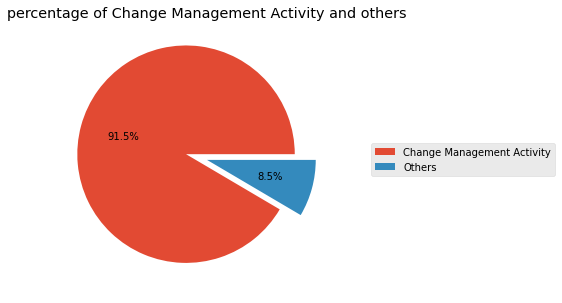

In [47]:
plt.rcParams['figure.figsize']=(5,5)
explode = (.2, 0)
plt.pie(df['RootCause'].value_counts(), explode = explode, autopct='%1.1f%%')
plt.title('percentage of Change Management Activity and others')
plt.legend(['Change Management Activity', 'Others'],loc=6,borderaxespad=30)


plt.show( )

In [48]:
columns_to_show = ["NctId", "Element", "ImtId"]

df.groupby(["RootCause"])[columns_to_show].describe(percentiles=[])

NctId                               Element                         \
           count unique              top  freq   count unique      top   freq   
RootCause                                                                       
0          46211     25  NCT.2205.011866  3984   46211    212  Unknown  45816   
1           4278     22  NCT.2205.011866   372    4278      1  Unknown   4278   

           ImtId                                
           count unique              top  freq  
RootCause                                       
0          46211   1001  IMT.2205.027120  5152  
1           4278     72  IMT.2205.024908   966

In [49]:
!pip install Jinja2


In [50]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


In [51]:
! python -m pip install --upgrade pip
! pip install pandas

In [52]:
print('no. of Change Management Activity')
df[df['RootCause']==0][['SiteId', 'Element']].groupby(['SiteId']).agg('count').sort_values('Element', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,Element
SiteId,
---,8652
Unknown,8168
W1991,1334
W1947,1334
W3032,1288
PONK1,632
PN02,560
PT01,414
PT06,390


In [53]:
print('no. of Change Management Activity')
df[df['RootCause']==1][['NctId', 'RuleName']].groupby(['NctId']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,RuleName
NctId,
NCT.2205.011866,372
NCT.2205.006487,186
NCT.2205.012412,186
NCT.2205.015564,186
NCT.2205.014920,186
NCT.2205.014918,186
NCT.2205.014689,186
NCT.2205.014582,186
NCT.2205.014474,186


In [54]:
print('no. of Change Management Activity')
df[df['RootCause']==1][['ImtId', 'RuleName']].groupby(['ImtId']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,RuleName
ImtId,
IMT.2205.024908,966
IMT.2205.019580,322
IMT.2205.030213,92
IMT.2205.030146,92
IMT.2205.029744,92
IMT.2205.028564,92
IMT.2205.024918,69
IMT.2205.017855,69
IMT.2205.026785,69


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50489 entries, 0 to 2570
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ImtId                    50489 non-null  object        
 1   AssociatedIdLeft         50489 non-null  object        
 2   Element                  50489 non-null  object        
 3   SiteId                   50489 non-null  object        
 4   Resolution               50489 non-null  object        
 5   Headline                 50489 non-null  object        
 6   NetcoolId                50489 non-null  object        
 7   NetworkImpactLeft        50489 non-null  object        
 8   ServiceImpactLeft        50489 non-null  object        
 9   StatusLeft               50489 non-null  object        
 10  PlatformLeft             50489 non-null  object        
 11  RecoveryPrime            50489 non-null  object        
 12  RuleName                 50489 no

In [56]:
print('no. of Change Management Activity')
df[df['RootCause']==1][['NctId', 'SiteId']].groupby(['NctId']).agg('count').sort_values('SiteId', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,SiteId
NctId,
NCT.2205.011866,372
NCT.2205.006487,186
NCT.2205.012412,186
NCT.2205.015564,186
NCT.2205.014920,186
NCT.2205.014918,186
NCT.2205.014689,186
NCT.2205.014582,186
NCT.2205.014474,186


In [57]:
print('no. of Change Management Activity')
df[df['RootCause']==1][['WindowStartDateTime', 'ImtId']].groupby(['WindowStartDateTime']).agg('count').sort_values('ImtId', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,ImtId
WindowStartDateTime,
,2418
2022-05-19 07:00:00,372
2022-01-26 00:00:00,186
2022-05-05 03:00:00,186
2022-05-13 07:00:00,186
2022-05-18 12:00:00,186
2022-05-26 08:00:00,186
2022-05-31 08:00:00,186
2022-06-03 00:00:00,186


In [58]:
print('no. of Change Management Activity')
df[df['RootCause']==1][['WindowEndDateTime', 'ImtId']].groupby(['WindowEndDateTime']).agg('count').sort_values('ImtId', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,ImtId
WindowEndDateTime,
,2418
2022-05-19 15:00:00,372
2022-01-26 06:00:00,186
2022-05-05 09:00:00,186
2022-05-13 23:59:00,186
2022-05-18 20:00:00,186
2022-05-26 16:00:00,186
2022-05-31 20:00:00,186
2022-06-03 06:00:00,186


In [59]:
print('no. of Change Management Activity')
df[df['RootCause']==0][['WindowEndDateTime', 'ImtId']].groupby(['WindowEndDateTime']).agg('count').sort_values('ImtId', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,ImtId
WindowEndDateTime,
,26286
2022-05-19 15:00:00,3984
2022-01-26 06:00:00,1992
2022-05-05 09:00:00,1992
2022-05-13 23:59:00,1992
2022-05-18 20:00:00,1992
2022-05-26 16:00:00,1992
2022-05-31 20:00:00,1992
2022-06-03 06:00:00,1992


In [60]:
#Let's check the supplier code for the unknown suppliers
df[df['RuleName']=='Unknown']['RuleName'].value_counts()

Unknown    2626
Name: RuleName, dtype: int64

In [61]:
# Let's check whether having AutomationType's number making any impact on RootCause
df['RuleName'].values[df['RuleName'].values>"0"]=1
df['RuleName'].fillna(0, inplace=True)
df[df['RuleName']==1]['RootCause'].value_counts()

0    46211
1     4278
Name: RootCause, dtype: int64

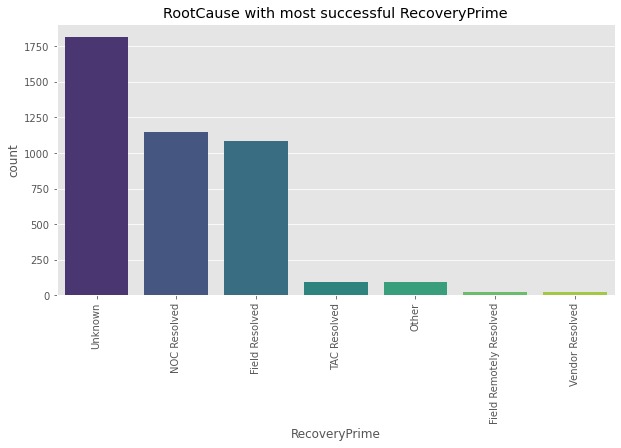

In [62]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df[df['RootCause']==1]['RecoveryPrime'],
             order=df[df['RootCause']==1]['RecoveryPrime'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('RootCause with most successful RecoveryPrime')
plt.show()

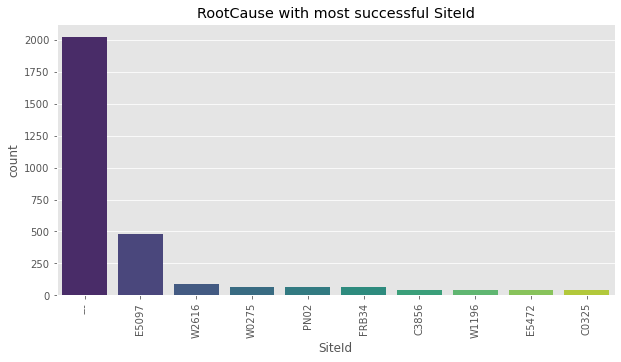

In [63]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df[df['RootCause']==1]['SiteId'],
             order=df[df['RootCause']==1]['SiteId'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('RootCause with most successful SiteId')
plt.show()

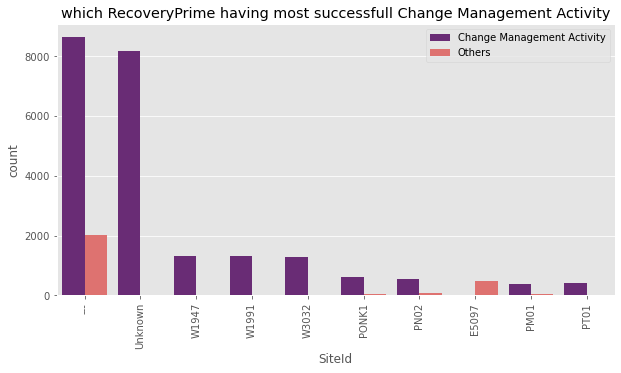

In [64]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df['SiteId'],
             order=df['SiteId'].value_counts().head(10).index,
              hue=df['RootCause'],
             palette='magma')
plt.xticks(rotation=90)
plt.title('which RecoveryPrime having most successfull Change Management Activity')
plt.legend(['Change Management Activity', 'Others'])
plt.show()

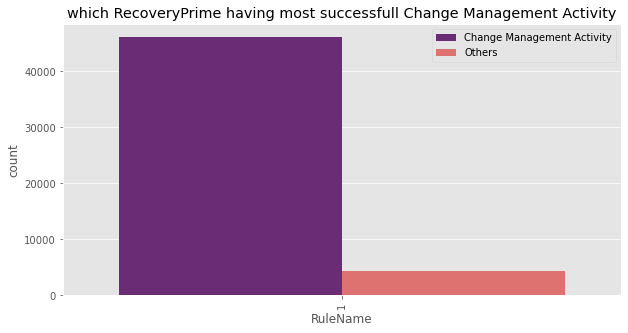

In [65]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df['RuleName'],
             order=df['RuleName'].value_counts().head(10).index,
              hue=df['RootCause'],
             palette='magma')
plt.xticks(rotation=90)
plt.title('which RecoveryPrime having most successfull Change Management Activity')
plt.legend(['Change Management Activity', 'Others'])
plt.show()

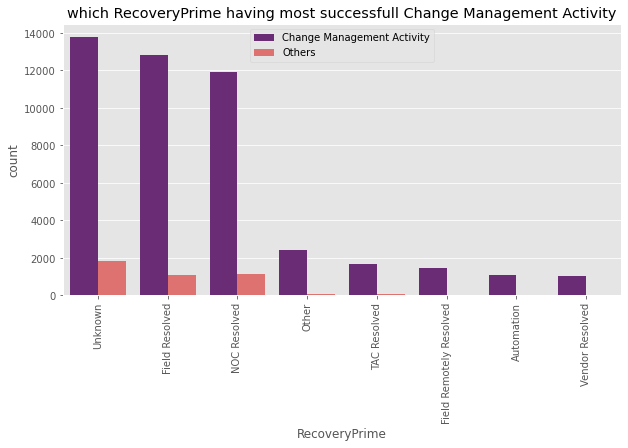

In [66]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df['RecoveryPrime'],
             order=df['RecoveryPrime'].value_counts().head(10).index,
              hue=df['RootCause'],
             palette='magma')
plt.xticks(rotation=90)
plt.title('which RecoveryPrime having most successfull Change Management Activity')
plt.legend(['Change Management Activity', 'Others'])
plt.show()

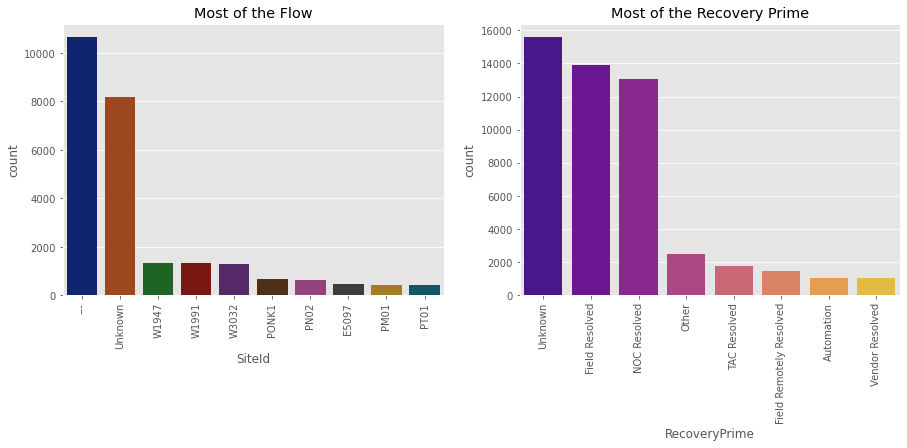

In [67]:
plt.rcParams['figure.figsize']=15,5

plt.subplot(121)
sns.countplot(df['SiteId'],
             order=df['SiteId'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the Flow')

plt.subplot(122)
sns.countplot(df['RecoveryPrime'],
             order=df['RecoveryPrime'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Recovery Prime')

plt.show()

In [68]:
corr_matrix=df.corr()

In [69]:
corr = df.corr()
corr

,RuleName,RootCause
RuleName,NaN,NaN
RootCause,NaN,1.0


Text(0.5, 1.0, 'Correlation between variables')

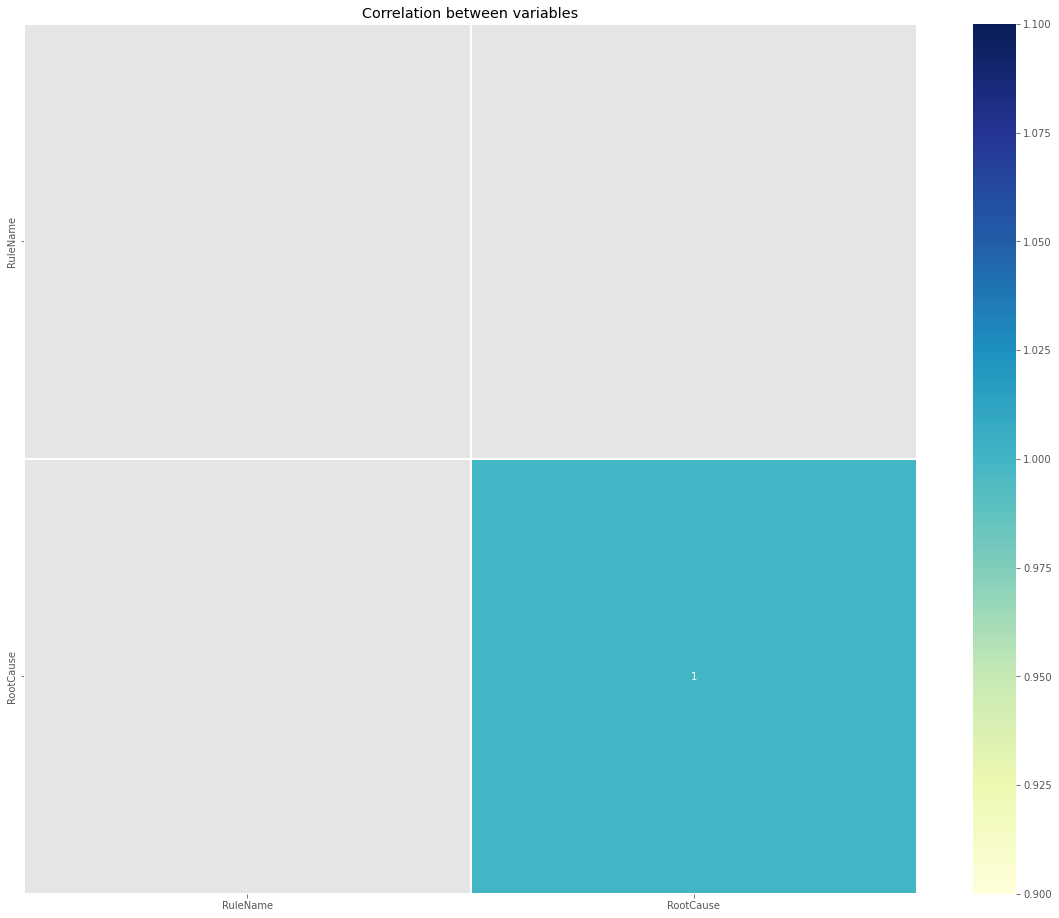

In [70]:
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

In [71]:
#let's make a copy of filtered data
df_copy=df.copy()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50489 entries, 0 to 2570
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ImtId                    50489 non-null  object        
 1   AssociatedIdLeft         50489 non-null  object        
 2   Element                  50489 non-null  object        
 3   SiteId                   50489 non-null  object        
 4   Resolution               50489 non-null  object        
 5   Headline                 50489 non-null  object        
 6   NetcoolId                50489 non-null  object        
 7   NetworkImpactLeft        50489 non-null  object        
 8   ServiceImpactLeft        50489 non-null  object        
 9   StatusLeft               50489 non-null  object        
 10  PlatformLeft             50489 non-null  object        
 11  RecoveryPrime            50489 non-null  object        
 12  RuleName                 50489 no

In [73]:
corr["RootCause"].sort_values(ascending=False)

RootCause    1.0
RuleName     NaN
Name: RootCause, dtype: float64

In [74]:
df['RootCause_NUM'] = df['RootCause'].map(lambda x: 1 if x == 'Change Management Activity' else 0)
df['RootCause_NUM'] = df['RootCause'].astype(int)

In [75]:
df["RootCause_NUM"].value_counts()

0    46211
1     4278
Name: RootCause_NUM, dtype: int64

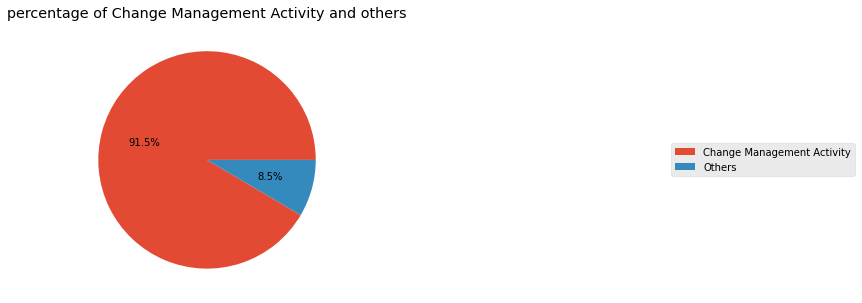

In [76]:
plt.rcParams['figure.figsize']=(25,5)
#explode = (.2, 0)
#plt.pie(df['RootCause'].value_counts(), explode = explode, autopct='%1.1f%%')
plt.pie(df['RootCause'].value_counts(), explode = None, autopct='%1.1f%%')
plt.title('percentage of Change Management Activity and others')
plt.legend(['Change Management Activity'
           ,'Others'
           ],loc=6,borderaxespad=60)


plt.show( )

In [77]:
#***********************************************************************************************************************
df['NctId_NUM']=df['NctId'].astype("category").cat.codes
df['AssociatedIdLeft_NUM']=df['AssociatedIdLeft'].astype("category").cat.codes
df['PlatformLeft_NUM']=df['PlatformLeft'].astype("category").cat.codes
df['Element_NUM']=df['Element'].astype("category").cat.codes
df['NetworkImpactLeft_NUM']=df['NetworkImpactLeft'].astype("category").cat.codes
df['ServiceImpactLeft_NUM']=df['ServiceImpactLeft'].astype("category").cat.codes
df['Site_NUM']=df['Site'].astype("category").cat.codes
df['StatusLeft_NUM']=df['StatusLeft'].astype("category").cat.codes
df['WindowStartDateTime_NUM']=df['WindowStartDateTime'].astype("category").cat.codes
df['WindowEndDateTime_NUM']=df['WindowEndDateTime'].astype("category").cat.codes
#df['SiteId_NUM']=df['SiteId'].astype("category").cat.codes
#df['NetworkImpactAdjustment_NUM']=df['NetworkImpactAdjustment_left'].astype("category").cat.codes
#df['PrimeElement_NUM']=df['PrimeElement'].astype("category").cat.codes
#df['NetworkImpact_NUM']=df['NetworkImpact'].astype("category").cat.codes
#df['SeverityLeft_NUM']=df['SeverityLeft'].astype("category").cat.codes
#df['SiteLeft_NUM']=df['SiteLeft'].astype("category").cat.codes
#df['Status_NUM']=df['Status'].astype("category").cat.codes
#df['NetworkImpactAdjustment_NUM']=df['NetworkImpactAdjustment'].astype("category").cat.codes
#***********************************************************************************************************************
df['ImtId_NUM']=df['ImtId'].astype("category").cat.codes
df['AssociatedIdRight_NUM']=df['AssociatedIdRight'].astype("category").cat.codes
df['SiteId_NUM']=df['SiteId'].astype("category").cat.codes
df['Resolution_NUM']=df['Resolution'].astype("category").cat.codes
df['Headline_NUM']=df['Headline'].astype("category").cat.codes
df['NetcoolId_NUM']=df['NetcoolId'].astype("category").cat.codes
df['NetworkImpactRight_NUM']=df['NetworkImpactRight'].astype("category").cat.codes
df['ServiceImpactRight_NUM']=df['ServiceImpactRight'].astype("category").cat.codes
df['StatusRight_NUM']=df['StatusRight'].astype("category").cat.codes
df['PlatformRight_NUM']=df['PlatformRight'].astype("category").cat.codes
df['RecoveryPrime_NUM']=df['RecoveryPrime'].astype("category").cat.codes
df['IncidentStart_NUM']=df['IncidentStart'].astype("category").cat.codes
df['StartDate_NUM']=df['StartDate'].astype("category").cat.codes
df['NetworkImpact1_NUM']=df['NetworkImpact1'].astype("category").cat.codes
df['Platform.1_NUM']=df['Platform.1'].astype("category").cat.codes
#df['SiteIdLeft_NUM']=df['SiteIdLeft'].astype("category").cat.codes
#df['NetcoolId_NUM']=df['NetcoolId'].astype("category").cat.codes
#df['SeverityRight_NUM']=df['SeverityRight'].astype("category").cat.codes
#df['RuleName_NUM']=df['RuleName'].astype("category").cat.codes
#df['RootCause_NUM']=df['RootCause'].astype("category").cat.codes
#df['EventSource_NUM']=df['EventSource'].astype("category").cat.codes
#df['EventSource_NUM']=df['EventSource'].astype("category").cat.codes
#***********************************************************************************************************************
#df['ComNetworkElementId_NUM']=df['ComNetworkElementId'].astype("category").cat.codes
#df['NetworkImpactRight_NUM']=df['NetworkImpactRight'].astype("category").cat.codes
#df['SiteRight_NUM']=df['SiteRight'].astype("category").cat.codes
#df['SiteIdRight_NUM']=df['SiteIdRight'].astype("category").cat.codes
#df['ElementType_NUM']=df['ElementType'].astype("category").cat.codes   
#df['Region_NUM']=df['Region'].astype("category").cat.codes 
#df['ServiceImpacted_NUM']=df['ServiceImpacted'].astype("category").cat.codes 
#df['EndDate_NUM']=df['EndDate'].astype("category").cat.codes 
#df['DurationOfNetworkelement_NUM']=df['DurationOfNetworkelement'].astype("category").cat.codes 
#df['RootCause_original_NUM']=df['RootCause_original'].astype("category").cat.codes 
#***********************************************************************************************************************

In [78]:
print(df.columns)

Index(['ImtId', 'AssociatedIdLeft', 'Element', 'SiteId', 'Resolution',
       'Headline', 'NetcoolId', 'NetworkImpactLeft', 'ServiceImpactLeft',
       'StatusLeft', 'PlatformLeft', 'RecoveryPrime', 'RuleName',
       'NetworkImpact1', 'NetcoolId1', 'Platform.1', 'RootCause',
       'IncidentStart', 'NctId', 'AssociatedIdRight', 'PlatformRight',
       'NetworkImpactRight', 'ServiceImpactRight', 'Site', 'StatusRight',
       'NetworkImpactAdjustment', 'WindowStartDateTime', 'WindowEndDateTime',
       'StartDate', 'RootCause_original', 'RootCause_NUM', 'NctId_NUM',
       'AssociatedIdLeft_NUM', 'PlatformLeft_NUM', 'Element_NUM',
       'NetworkImpactLeft_NUM', 'ServiceImpactLeft_NUM', 'Site_NUM',
       'StatusLeft_NUM', 'WindowStartDateTime_NUM', 'WindowEndDateTime_NUM',
       'ImtId_NUM', 'AssociatedIdRight_NUM', 'SiteId_NUM', 'Resolution_NUM',
       'Headline_NUM', 'NetcoolId_NUM', 'NetworkImpactRight_NUM',
       'ServiceImpactRight_NUM', 'StatusRight_NUM', 'PlatformRight_NUM',


In [79]:
cols = ['NctId', 'AssociatedIdLeft', 'PlatformLeft', 'Element',
       'NetworkImpactLeft', 'ServiceImpactLeft', 'Site', 'StatusLeft',
       'NetworkImpactAdjustment', 'WindowStartDateTime', 'WindowEndDateTime',
       'ImtId', 'AssociatedIdRight', 'SiteId', 'Resolution', 'Headline',
       'NetcoolId', 'NetworkImpactRight', 'ServiceImpactRight', 'StatusRight',
       'PlatformRight', 'RecoveryPrime', 'RuleName', 'NetworkImpact1',
       'NetcoolId1', 'Platform.1', 'RootCause', 'IncidentStart', 'StartDate','RootCause_original', 'IncidentStart_NUM', 
        'Platform.1_NUM', 'Resolution_NUM','NetworkImpactLeft_NUM','RootCause_NUM'
         ]


#Splitting dataset into labels and features
X = df.drop(columns = cols)
y = df.RootCause_NUM


In [80]:
X

,NctId_NUM,AssociatedIdLeft_NUM,PlatformLeft_NUM,Element_NUM,ServiceImpactLeft_NUM,Site_NUM,StatusLeft_NUM,WindowStartDateTime_NUM,WindowEndDateTime_NUM,ImtId_NUM,...,SiteId_NUM,Headline_NUM,NetcoolId_NUM,NetworkImpactRight_NUM,ServiceImpactRight_NUM,StatusRight_NUM,PlatformRight_NUM,RecoveryPrime_NUM,StartDate_NUM,NetworkImpact1_NUM
0,0,4,3,211,1,1,0,11,11,0,...,323,602,1,3,3,0,3,6,0,1
0,1,4,3,211,1,1,0,11,11,0,...,323,602,1,3,3,1,3,6,0,1
0,2,4,3,211,1,1,0,11,11,0,...,323,602,1,3,3,0,3,6,0,1
0,3,4,3,211,1,1,0,11,11,0,...,323,602,1,3,3,1,3,6,0,1
0,4,4,3,211,1,1,0,2,2,0,...,323,602,1,2,2,1,2,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,19,1647,10,211,0,1,0,0,0,1072,...,0,148,790,1,1,0,2,2,0,0
2570,20,1647,10,211,0,1,0,9,9,1072,...,0,148,790,0,1,1,0,2,0,0
2570,21,1647,10,211,0,1,0,10,10,1072,...,0,148,790,0,1,1,0,2,0,0
2570,22,1647,10,211,0,1,0,7,7,1072,...,0,148,790,1,1,1,0,2,0,0


### Feature Selection- Dropping constant features


In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

##### Variance Threshold


Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [81]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [82]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True])

In [83]:
X.columns[var_thres.get_support()]

Index(['NctId_NUM', 'AssociatedIdLeft_NUM', 'PlatformLeft_NUM', 'Element_NUM',
       'ServiceImpactLeft_NUM', 'Site_NUM', 'StatusLeft_NUM',
       'WindowStartDateTime_NUM', 'WindowEndDateTime_NUM', 'ImtId_NUM',
       'AssociatedIdRight_NUM', 'SiteId_NUM', 'Headline_NUM', 'NetcoolId_NUM',
       'NetworkImpactRight_NUM', 'ServiceImpactRight_NUM', 'StatusRight_NUM',
       'PlatformRight_NUM', 'RecoveryPrime_NUM', 'NetworkImpact1_NUM'],
      dtype='object')

In [84]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [85]:
for feature in constant_columns:
     print(feature)

StartDate_NUM


In [86]:
X=X.drop(constant_columns,axis=1)

In [87]:
X.corr()

,NctId_NUM,AssociatedIdLeft_NUM,PlatformLeft_NUM,Element_NUM,ServiceImpactLeft_NUM,Site_NUM,StatusLeft_NUM,WindowStartDateTime_NUM,WindowEndDateTime_NUM,ImtId_NUM,AssociatedIdRight_NUM,SiteId_NUM,Headline_NUM,NetcoolId_NUM,NetworkImpactRight_NUM,ServiceImpactRight_NUM,StatusRight_NUM,PlatformRight_NUM,RecoveryPrime_NUM,NetworkImpact1_NUM
NctId_NUM,1.000000,0.010446,0.017017,-0.131941,-0.018245,-0.000948,-0.001869,-0.132056,-0.132056,-0.005738,-0.071195,0.007737,-0.023069,0.021719,-0.370416,-0.327167,0.009348,-0.400771,-0.007274,-0.017548
AssociatedIdLeft_NUM,0.010446,1.000000,0.007897,-0.059397,0.083742,0.002134,0.079640,0.004190,0.004190,0.244645,0.002091,0.016575,0.042804,0.445808,0.004936,0.004904,0.016512,0.004279,0.057689,-0.058399
PlatformLeft_NUM,0.017017,0.007897,1.000000,-0.106535,0.052487,0.011216,0.026380,0.006888,0.006888,-0.117498,0.003347,0.167568,0.102142,-0.052844,0.008077,0.008041,0.026915,0.006978,0.066115,-0.203999
Element_NUM,-0.131941,-0.059397,-0.106535,1.000000,0.111041,-0.065506,0.017706,-0.053480,-0.053480,0.030913,-0.026277,-0.046613,0.143052,-0.125409,-0.062587,-0.062332,-0.208875,-0.054405,0.050142,0.104563
ServiceImpactLeft_NUM,-0.018245,0.083742,0.052487,0.111041,1.000000,-0.014380,-0.118538,-0.007359,-0.007359,0.165596,-0.003542,-0.045210,0.088755,0.055280,-0.008659,-0.008613,-0.028820,-0.007426,-0.098837,0.299881
Site_NUM,-0.000948,0.002134,0.011216,-0.065506,-0.014380,1.000000,-0.006572,-0.002402,-0.002402,0.000950,-0.014371,0.004931,-0.018521,0.009813,0.001601,0.000909,-0.008919,-0.012409,-0.009993,-0.011732
StatusLeft_NUM,-0.001869,0.079640,0.026380,0.017706,-0.118538,-0.006572,1.000000,-0.000808,-0.000808,0.116917,-0.000331,-0.056377,0.035091,0.151696,-0.000913,-0.000923,-0.002974,-0.000782,0.299119,-0.000835
WindowStartDateTime_NUM,-0.132056,0.004190,0.006888,-0.053480,-0.007359,-0.002402,-0.000808,1.000000,1.000000,-0.002368,0.302454,0.003116,-0.009326,0.008755,0.623740,0.767443,0.092038,0.462927,-0.002959,-0.007072
WindowEndDateTime_NUM,-0.132056,0.004190,0.006888,-0.053480,-0.007359,-0.002402,-0.000808,1.000000,1.000000,-0.002368,0.302454,0.003116,-0.009326,0.008755,0.623740,0.767443,0.092038,0.462927,-0.002959,-0.007072
ImtId_NUM,-0.005738,0.244645,-0.117498,0.030913,0.165596,0.000950,0.116917,-0.002368,-0.002368,1.000000,-0.001219,-0.107081,-0.040106,0.774516,-0.002723,-0.002724,-0.009144,-0.002457,0.042283,0.070336


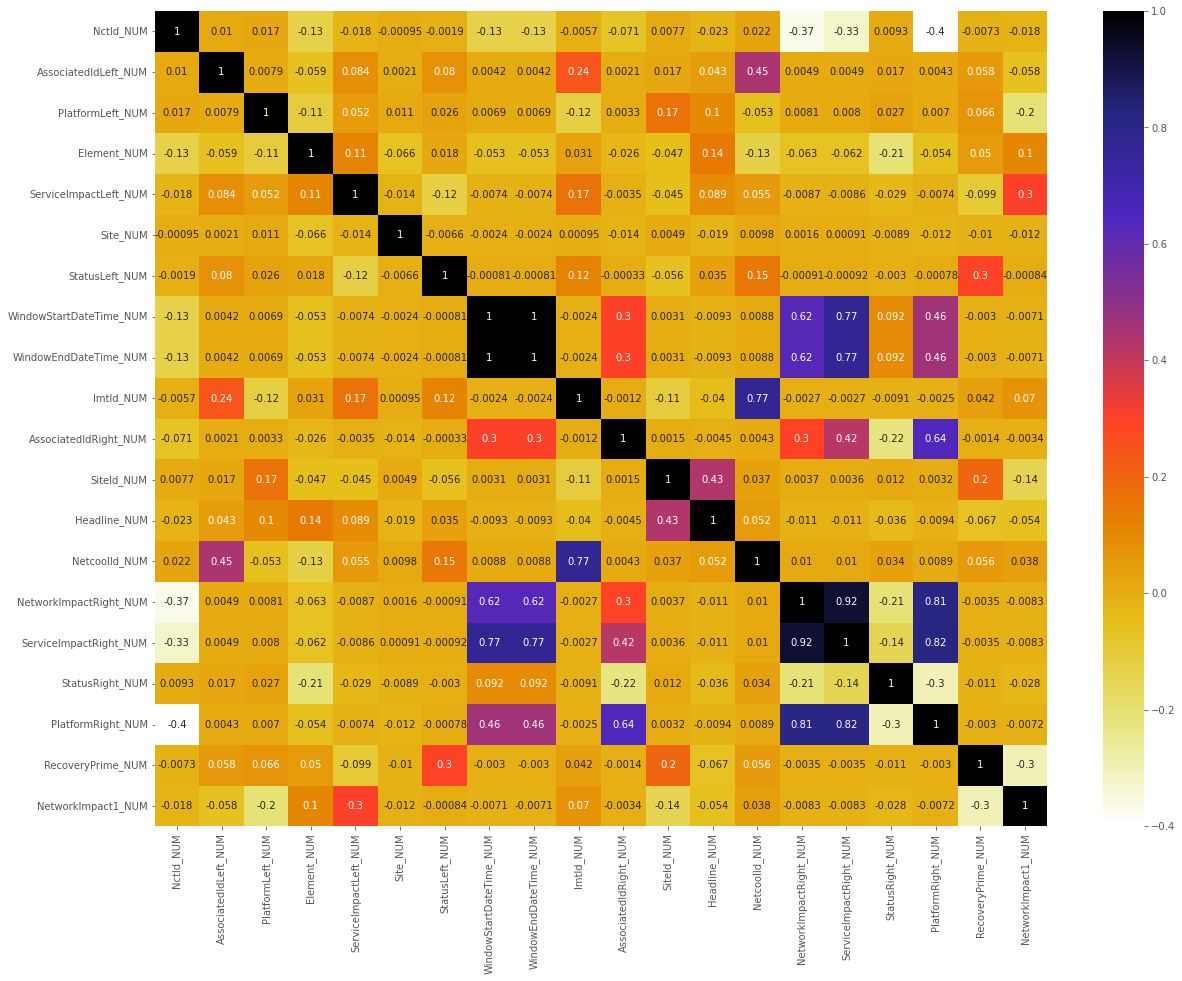

In [88]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [89]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [90]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

4

In [91]:
corr_features

{'NetcoolId_NUM',
 'PlatformRight_NUM',
 'ServiceImpactRight_NUM',
 'WindowEndDateTime_NUM'}

In [92]:
#X_train.drop(corr_features,axis=1)
#X_test.drop(corr_features,axis=1)
X.drop(corr_features,axis=1)


,NctId_NUM,AssociatedIdLeft_NUM,PlatformLeft_NUM,Element_NUM,ServiceImpactLeft_NUM,Site_NUM,StatusLeft_NUM,WindowStartDateTime_NUM,ImtId_NUM,AssociatedIdRight_NUM,SiteId_NUM,Headline_NUM,NetworkImpactRight_NUM,StatusRight_NUM,RecoveryPrime_NUM,NetworkImpact1_NUM
0,0,4,3,211,1,1,0,11,0,5,323,602,3,0,6,1
0,1,4,3,211,1,1,0,11,0,5,323,602,3,1,6,1
0,2,4,3,211,1,1,0,11,0,5,323,602,3,0,6,1
0,3,4,3,211,1,1,0,11,0,5,323,602,3,1,6,1
0,4,4,3,211,1,1,0,2,0,5,323,602,2,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,19,1647,10,211,0,1,0,0,1072,5,0,148,1,0,2,0
2570,20,1647,10,211,0,1,0,9,1072,5,0,148,0,1,2,0
2570,21,1647,10,211,0,1,0,10,1072,5,0,148,0,1,2,0
2570,22,1647,10,211,0,1,0,7,1072,3,0,148,1,1,2,0


In [93]:
# DATA PREPROCESSING - Scaling Data

#standardizing all the columns
sc=StandardScaler()
scaled=sc.fit_transform(X)

#converted to dataframe to work easily on columns
X_scaled=pd.DataFrame(scaled, columns=X.columns)
#print(data)

In [94]:
from sklearn.preprocessing import StandardScaler

#to_scale=df_cln.select_dtypes(include='number').columns.tolist()[1:-1]
sc=StandardScaler()
scaled=sc.fit_transform(X)
x_scl=pd.DataFrame(scaled, columns=X.columns)

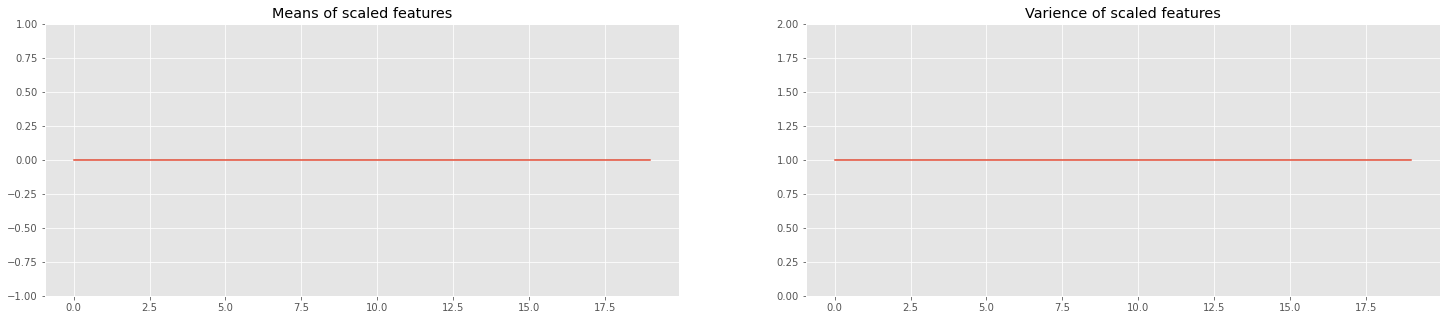

In [95]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [99]:
scaled_data=scaler.transform(X)

In [100]:
scaled_data

array([[-1.66547797, -1.80770501, -1.19031892, ...,  0.7260742 ,
         1.23879134, -0.69411403],
       [-1.52422191, -1.80770501, -1.19031892, ...,  0.7260742 ,
         1.23879134, -0.69411403],
       [-1.38296586, -1.80770501, -1.19031892, ...,  0.7260742 ,
         1.23879134, -0.69411403],
       ...,
       [ 1.30089919,  1.68101836,  1.38743023, ..., -1.79782264,
        -0.94543551, -1.64710047],
       [ 1.44215525,  1.68101836,  1.38743023, ..., -1.79782264,
        -0.94543551, -1.64710047],
       [ 1.5834113 ,  1.68101836,  1.38743023, ...,  0.7260742 ,
        -0.94543551, -1.64710047]])

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca=PCA(n_components=2)

In [103]:
pca.fit(scaled_data)

PCA(n_components=2)

In [104]:
x_pca=pca.transform(scaled_data)

In [105]:
scaled_data.shape

(50489, 20)

In [106]:
x_pca.shape

(50489, 2)

In [107]:
scaled_data

array([[-1.66547797, -1.80770501, -1.19031892, ...,  0.7260742 ,
         1.23879134, -0.69411403],
       [-1.52422191, -1.80770501, -1.19031892, ...,  0.7260742 ,
         1.23879134, -0.69411403],
       [-1.38296586, -1.80770501, -1.19031892, ...,  0.7260742 ,
         1.23879134, -0.69411403],
       ...,
       [ 1.30089919,  1.68101836,  1.38743023, ..., -1.79782264,
        -0.94543551, -1.64710047],
       [ 1.44215525,  1.68101836,  1.38743023, ..., -1.79782264,
        -0.94543551, -1.64710047],
       [ 1.5834113 ,  1.68101836,  1.38743023, ...,  0.7260742 ,
        -0.94543551, -1.64710047]])

In [108]:
x_pca

array([[-2.09074074, -3.14057188],
       [-1.8978367 , -3.08935661],
       [-2.03947212, -3.1366891 ],
       ...,
       [ 1.81221851,  2.24361239],
       [ 2.57702357,  2.24319543],
       [-1.39412768,  2.23299912]])

Text(0, 0.5, 'Second principle component')

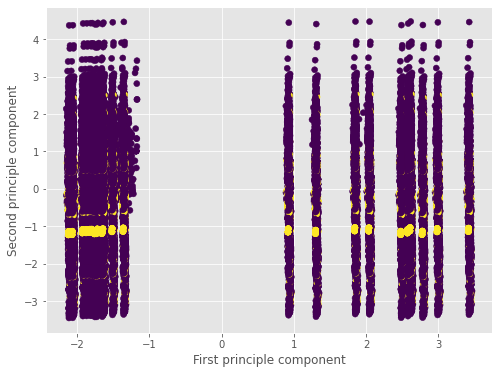

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['RootCause_NUM'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')



## '''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step TWO"'''''''''''''''''''''''''''''''''''''''''''''''''

========================================================================================================================

# --------------------------------   PART TWO MODEL BUILDING   -------------------------------

========================================================================================================================

*******************************************************************************************************************************
###############################################################################################################################

# ''''''''''''''''''''''...Data Handling - Predictive / Supervised Learning...''''''''''''''''''''

###############################################################################################################################
*******************************************************************************************************************************

## 1. Root Cause Analysis by Implementing Mechine Learning Algorithms

###############################################################################################################################

In [110]:
#scaling data is necessary for making gradient descent faster 
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x_pca))
y = pd.Series(y)

In [111]:
#For cross-validation using train-test split ( TEST-SIZE = 30% )
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,random_state=0)

In [112]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("y_test shape {}, len {}.".format(y_test.shape,len(y_test)))

X_train shape (37866, 2), len 37866.
X_test shape (12623, 2), len 12623.
y_train shape (37866,), len 37866.
y_test shape (12623,), len 12623.


### 2.1. MACRO FOR CALCULATING FOR CALCULATING  Precision, Recall and F1

In [113]:
#CREATE MACRO
results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "pre_macro", "recall_macro", "f1_macro", "f1_macro_manual"]

def evaluate(true, predicted):
    pre_macro = metrics.precision_score(true, predicted, average="macro")
    recall_macro = metrics.recall_score(true, predicted, average="macro")
    f1_macro = metrics.f1_score(true, predicted, average="macro")
    f1_score_raw = metrics.f1_score(true, predicted, average=None)
    f1_macro_manual = f1_score_raw.mean()
    return pre_macro, recall_macro, f1_macro, f1_macro_manual

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred), cross_val_score(model, X, y,cv=5).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

### 2.2.1. KNN Model

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test,pred_knn)

In [116]:
print('confusion_matrix KNN      :\n', metrics.confusion_matrix(y_test, pred_knn))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN :\n',metrics.classification_report(y_test, pred_knn))

confusion_matrix KNN      :
 [[11360   179]
 [  814   270]]
---------------------------------------------------------------------------------------------------------------------

classification_report KNN :
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     11539
           1       0.60      0.25      0.35      1084

    accuracy                           0.92     12623
   macro avg       0.77      0.62      0.66     12623
weighted avg       0.90      0.92      0.91     12623



### 2.2.2. Logestic Regression Model

In [117]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_log = log_reg.predict(X_test)
score_log = accuracy_score(y_test,pred_log)

In [118]:
print('confusion_matrix LogisticRegression      :\n', metrics.confusion_matrix(y_test, pred_log))
print('------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogisticRegression :\n',metrics.classification_report(y_test, pred_log))

confusion_matrix LogisticRegression      :
 [[11539     0]
 [ 1084     0]]
------------------------------------------------------------------------------------------------------------------

classification_report LogisticRegression :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     11539
           1       0.00      0.00      0.00      1084

    accuracy                           0.91     12623
   macro avg       0.46      0.50      0.48     12623
weighted avg       0.84      0.91      0.87     12623



### 2.2.3. SVC Model

In [119]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
score_svc = accuracy_score(y_test,pred_svc)

In [120]:
print('confusion_matrix SVC      :\n', metrics.confusion_matrix(y_test, pred_svc))
print('------------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC :\n',metrics.classification_report(y_test, pred_svc))

confusion_matrix SVC      :
 [[11539     0]
 [ 1084     0]]
------------------------------------------------------------------------------------------------------------------

classification_report SVC :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     11539
           1       0.00      0.00      0.00      1084

    accuracy                           0.91     12623
   macro avg       0.46      0.50      0.48     12623
weighted avg       0.84      0.91      0.87     12623



### 2.2.4. Random Forest Model

In [121]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
score_rfc = accuracy_score(y_test,pred_rfc)

In [122]:
print('confusion_matrix RandomForest      :\n', metrics.confusion_matrix(y_test, pred_rfc))
print('------------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest :\n',metrics.classification_report(y_test, pred_rfc))

confusion_matrix RandomForest      :
 [[11408   131]
 [  777   307]]
------------------------------------------------------------------------------------------------------------------

classification_report RandomForest :
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     11539
           1       0.70      0.28      0.40      1084

    accuracy                           0.93     12623
   macro avg       0.82      0.64      0.68     12623
weighted avg       0.92      0.93      0.91     12623



### 2.2.5. Ada Boost Model

In [123]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
adab.fit(X_train,y_train)
pred_adab = adab.predict(X_test)
score_adab = accuracy_score(y_test,pred_adab)

In [124]:
print('confusion_matrix AdaBoost      :\n', metrics.confusion_matrix(y_test, pred_adab))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost :\n',metrics.classification_report(y_test, pred_adab))

confusion_matrix AdaBoost      :
 [[11539     0]
 [ 1084     0]]
-----------------------------------------------------------------------------------------------------------------

classification_report AdaBoost :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     11539
           1       0.00      0.00      0.00      1084

    accuracy                           0.91     12623
   macro avg       0.46      0.50      0.48     12623
weighted avg       0.84      0.91      0.87     12623



### 2.2.6. Ridge Classification Model 

### 2.2.7. Decision Tree Regressor Model

In [125]:
from sklearn import tree

In [126]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

In [127]:
print('confusion_matrix AdaBoost      :\n', metrics.confusion_matrix(y_test, pred_dtree))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost :\n',metrics.classification_report(y_test, pred_dtree))

confusion_matrix AdaBoost      :
 [[10802   737]
 [  705   379]]
-----------------------------------------------------------------------------------------------------------------

classification_report AdaBoost :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     11539
           1       0.34      0.35      0.34      1084

    accuracy                           0.89     12623
   macro avg       0.64      0.64      0.64     12623
weighted avg       0.89      0.89      0.89     12623



### 2.2.8. Gradient Boosting Classifier Model (GBM)

In [128]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)

In [129]:
print('confusion_matrix AdaBoost      :\n', metrics.confusion_matrix(y_test, pred_gbm))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost :\n',metrics.classification_report(y_test, pred_gbm))

confusion_matrix AdaBoost      :
 [[11535     4]
 [ 1074    10]]
-----------------------------------------------------------------------------------------------------------------

classification_report AdaBoost :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     11539
           1       0.71      0.01      0.02      1084

    accuracy                           0.91     12623
   macro avg       0.81      0.50      0.49     12623
weighted avg       0.90      0.91      0.87     12623



### 2.2.9. XGBoost Classifier Model

In [130]:
xg_reg = xgb.XGBClassifier()

In [131]:
xg_reg.fit(X_train, y_train)
pred_xg_reg = xg_reg.predict(X_test)

[10:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [132]:
print('confusion_matrix AdaBoost      :\n', metrics.confusion_matrix(y_test, pred_xg_reg))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost :\n',metrics.classification_report(y_test, pred_xg_reg))

confusion_matrix AdaBoost      :
 [[11477    62]
 [  946   138]]
-----------------------------------------------------------------------------------------------------------------

classification_report AdaBoost :
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     11539
           1       0.69      0.13      0.21      1084

    accuracy                           0.92     12623
   macro avg       0.81      0.56      0.59     12623
weighted avg       0.90      0.92      0.89     12623



### 2.2.10. LassoCV Classifier Model

lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

## 2.3. Regularization and Optimization all Models

###############################################################################################################################

### 2.3.1. KNN Opt

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_knn=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_s = knn.predict(X_test)
    scores = accuracy_score(y_test,pred_s)
    list_knn.append(scores)

In [134]:
print(max(list_knn))

0.9284639150756555


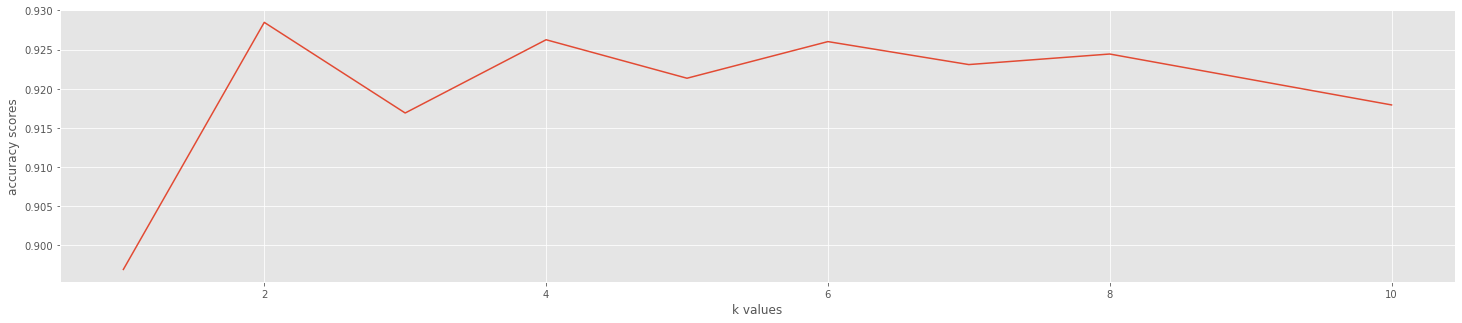

In [135]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),list_knn)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [136]:
#KNN TUNING:

#Initiating Random Forest regressor
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Define the grid of hyperparameters
params_grid = {'n_neighbors': [5,10,15],
              'weights': ['uniform','distance']
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = knn_model, param_grid = params_grid , cv = 5)
                       
#Fitting the grid search
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [137]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_knn_g = grid_model.best_estimator_.predict(X_test)
print(pred_knn_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'n_neighbors': 15, 'weights': 'distance'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9262134797050281
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 0 0 0 0 0 0 0 0 0]
2321    0
885     0
1267    0
248     0
2296    0
1242    0
1625    0
728     0
2343    0
1446    0
Name: RootCause_NUM, dtype: int32


In [138]:
print('confusion_matrix KNN_opt     :\n', metrics.confusion_matrix(y_test, pred_knn_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN_opt :\n',metrics.classification_report(y_test, pred_knn_g))

confusion_matrix KNN_opt     :
 [[11393   146]
 [  765   319]]
---------------------------------------------------------------------------------------------------------------------

classification_report KNN_opt :
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     11539
           1       0.69      0.29      0.41      1084

    accuracy                           0.93     12623
   macro avg       0.81      0.64      0.69     12623
weighted avg       0.92      0.93      0.91     12623



### 2.3.2. Logistic Regression Optimization

In [139]:
#print(X['DESCR'])

In [140]:
from sklearn.linear_model import SGDClassifier
lclassifier = SGDClassifier(loss='hinge',learning_rate='optimal', eta0=0.01, penalty='l2')

In [141]:
#compare that k-fold scores
print("linear regression's 10-fold score:",cross_val_score(lclassifier, X, y, cv=5).mean())

linear regression's 10-fold score: 0.9152686734280568


In [142]:
#Gradient descent can used in different models that have a loss function
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': [ 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'penalty':['l2', 'l1', 'elasticnet'],
            'alpha': [0.0001,0.1,1],
            'l1_ratio':[0,0.1,1],
            'learning_rate':['optimal'],
            'eta0':[0.0],
            'power_t':[0.5]
         }
grid_model2 = GridSearchCV(SGDClassifier(random_state=0), params, cv=5)
grid_model2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [0.0001, 0.1, 1], 'eta0': [0.0],
                         'l1_ratio': [0, 0.1, 1], 'learning_rate': ['optimal'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'power_t': [0.5]})

In [143]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model2.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model2.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_log_g = grid_model2.best_estimator_.predict(X_test)
print(pred_log_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.0001, 'eta0': 0.0, 'l1_ratio': 0, 'learning_rate': 'optimal', 'loss': 'squared_error', 'penalty': 'l2', 'power_t': 0.5}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9156499238762255
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 0 0 0 0 0 0 0 0 0]
2321    0
885     0
1267    0
248     0
2296    0
1242    0
1625    0
728     0
2343    0
1446    0
Name: RootCause_NUM, dtype: int32


In [144]:
print('confusion_matrix LogesticRegression_opt      :\n', metrics.confusion_matrix(y_test, pred_log_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogesticRegression_opt :\n',metrics.classification_report(y_test, pred_log_g))

confusion_matrix LogesticRegression_opt      :
 [[11539     0]
 [ 1084     0]]
---------------------------------------------------------------------------------------------------------------------

classification_report LogesticRegression_opt :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     11539
           1       0.00      0.00      0.00      1084

    accuracy                           0.91     12623
   macro avg       0.46      0.50      0.48     12623
weighted avg       0.84      0.91      0.87     12623



### 2.3.3. SVC opt

In [145]:
svc = SGDClassifier(loss='hinge', learning_rate='constant',eta0=0.5)

In [146]:
print("svc's 5-fold score:",cross_val_score(svc,X,y,cv=5).mean())

svc's 5-fold score: 0.9152686734280568


In [147]:
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['hinge'],
            'alpha': [0.001,0.01,0.1,1],
            'l1_ratio':[0,0.5,1],
            'learning_rate':['constant'],
            'eta0':[0.001,0.01,0.1,1],
            'power_t':[0.5,1,2]
         }
grid_model3 = GridSearchCV(SGDClassifier(penalty='elasticnet',random_state=0),
                          params,cv=5)
grid_model3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(penalty='elasticnet', random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0, 0.5, 1],
                         'learning_rate': ['constant'], 'loss': ['hinge'],
                         'power_t': [0.5, 1, 2]})

In [148]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model3.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model3.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_svc_g = grid_model3.best_estimator_.predict(X_test)
print(pred_svc_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.001, 'eta0': 0.001, 'l1_ratio': 0, 'learning_rate': 'constant', 'loss': 'hinge', 'power_t': 0.5}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9156499238762255
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 0 0 0 0 0 0 0 0 0]
2321    0
885     0
1267    0
248     0
2296    0
1242    0
1625    0
728     0
2343    0
1446    0
Name: RootCause_NUM, dtype: int32


In [149]:
print('confusion_matrix SVC_opt      :\n', metrics.confusion_matrix(y_test, pred_svc_g))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC_opt :\n',metrics.classification_report(y_test, pred_svc_g))

confusion_matrix SVC_opt      :
 [[11539     0]
 [ 1084     0]]
-----------------------------------------------------------------------------------------------------------------

classification_report SVC_opt :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     11539
           1       0.00      0.00      0.00      1084

    accuracy                           0.91     12623
   macro avg       0.46      0.50      0.48     12623
weighted avg       0.84      0.91      0.87     12623



### 2.3.4. RandomForest Model

In [150]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=42),
                                 X,y,cv=5).mean())

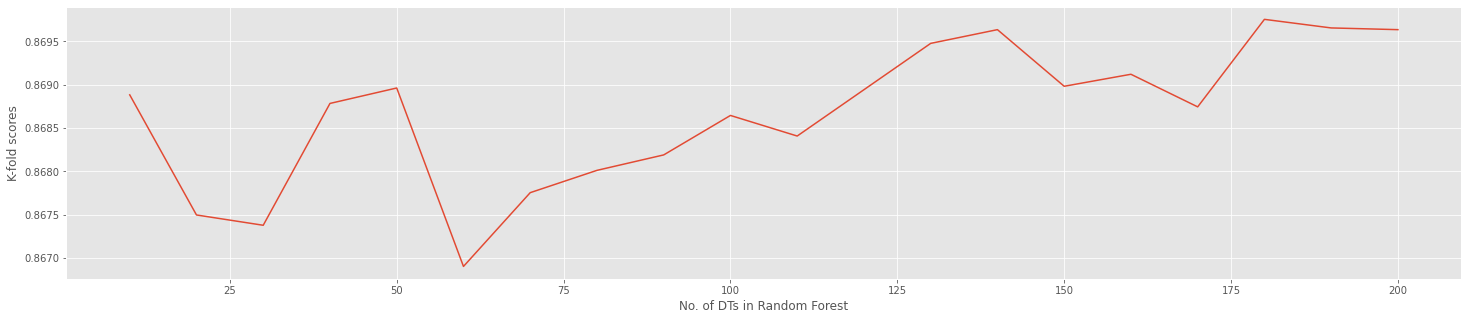

In [151]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in Random Forest')
plt.ylabel('K-fold scores')
plt.show()

In [152]:

#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [100,115,120],
            'max_depth': [5,12,14]
        }
grid_model4 = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=5)
grid_model4.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 12, 14],
                         'n_estimators': [100, 115, 120]})

In [153]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model4.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model4.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_rfo = grid_model4.best_estimator_.predict(X_test)
print(pred_rfo[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 5, 'n_estimators': 100}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9142783783201146
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[0 0 0 0 0 0 0 0 0 0]
2321    0
885     0
1267    0
248     0
2296    0
1242    0
1625    0
728     0
2343    0
1446    0
Name: RootCause_NUM, dtype: int32


In [154]:
print('confusion_matrix RandomForest_opt      :\n', metrics.confusion_matrix(y_test, pred_rfo))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest_opt :\n',metrics.classification_report(y_test, pred_rfo))

confusion_matrix RandomForest_opt      :
 [[11003   536]
 [ 1030    54]]
---------------------------------------------------------------------------------------------------------------------

classification_report RandomForest_opt :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     11539
           1       0.09      0.05      0.06      1084

    accuracy                           0.88     12623
   macro avg       0.50      0.50      0.50     12623
weighted avg       0.84      0.88      0.86     12623



### 2.3.5. Adaboost Model

In [155]:
#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(1,201,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=5).mean())

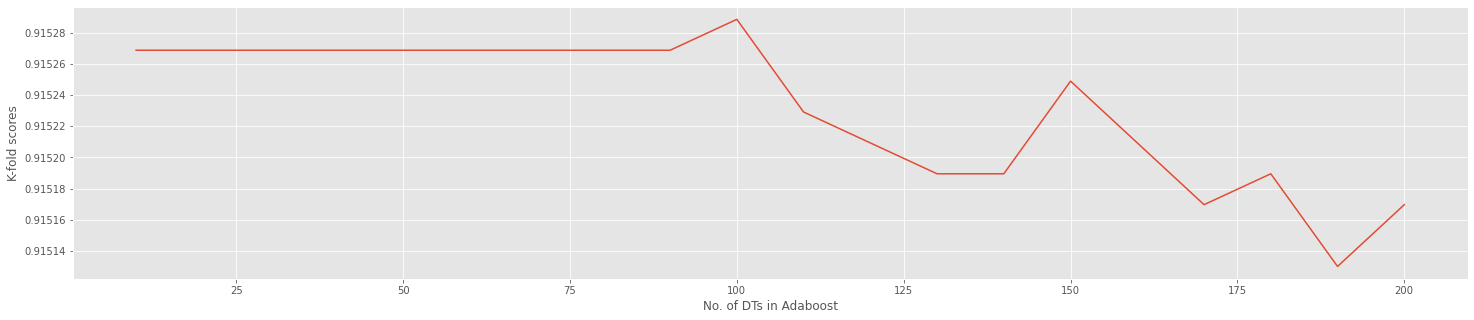

In [156]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [157]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
from sklearn.tree import DecisionTreeClassifier
params = {
            'n_estimators': [0.1,1,5,10],
            'base_estimator': [DecisionTreeClassifier(max_depth=13,random_state=0),
                               DecisionTreeClassifier(max_depth=14,random_state=0),
                               DecisionTreeClassifier(max_depth=16,random_state=0)]
        }
grid_model5 = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=5)
grid_model5.fit(X,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=13,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=14,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=16,
                                                                   random_state=0)],
                         'n_estimators': [0.1, 1, 5, 10]})

In [158]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model5.best_params_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model5.best_score_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------\n')
pred_adab_o = grid_model5.best_estimator_.predict(X_test)
print(pred_adab_o[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'base_estimator': DecisionTreeClassifier(max_depth=13, random_state=0), 'n_estimators': 1}
-----------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.8796180024646256
-----------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------

[0 1 0 0 0 0 0 0 0 0]
2321    0
885     0
1267    0
248     0
2296    0
1242    0
1625    0
728     0
2343    0
1446    0
Name: RootCause_NUM, dtype: int32


In [159]:
print('confusion_matrix  AdaBoost_opt      :\n', metrics.confusion_matrix(y_test, pred_adab_o))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost_opt :\n',metrics.classification_report(y_test, pred_adab_o))

confusion_matrix  AdaBoost_opt      :
 [[10080  1459]
 [  930   154]]
-----------------------------------------------------------------------------------------------------------------

classification_report AdaBoost_opt :
               precision    recall  f1-score   support

           0       0.92      0.87      0.89     11539
           1       0.10      0.14      0.11      1084

    accuracy                           0.81     12623
   macro avg       0.51      0.51      0.50     12623
weighted avg       0.85      0.81      0.83     12623



### 2.3.6. Decision Tree Classifier Model Opt

In [160]:
#Graph k-fold score vs no. of estimators in Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
scores = []
for i in range(1,201,10):
    dtree = DecisionTreeClassifier(max_depth=i,random_state=0)
    scores.append(cross_val_score(dtree, X,y,cv=5).mean())

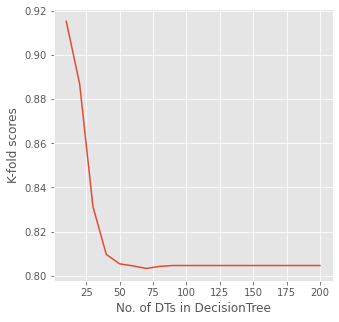

In [161]:
plt.figure(figsize=(5,5))
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in DecisionTree')
plt.ylabel('K-fold scores')
plt.show()

In [162]:
#Decision Tree TUNING:

#Initiating Random Forest regressor
dtree_model = DecisionTreeClassifier(random_state=0)

#Define the grid of hyperparameters
params_grid = {
              'max_depth': [5],
              'splitter' : ['random'],
              'min_samples_split': [2],
              'min_samples_leaf': [1],
              'max_features': [None]
              
              }

#Initiate Grid search
grid_model6 = GridSearchCV( estimator =dtree_model,
                       param_grid = params_grid ,
                       cv = 5,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model6.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5], 'max_features': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'splitter': ['random']},
             scoring='neg_mean_squared_error', verbose=1)

In [163]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model6.best_params_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model6.best_score_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------\n')
pred_dtree = grid_model6.best_estimator_.predict(X_test)
print(pred_dtree[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
-----------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : -0.08437648573687372
-----------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------

[0 0 0 0 0 0 0 0 0 0]
2321    0
885     0
1267    0
248     0
2296    0
1242    0
1625    0
728     0
2343    0
1446    0
Name: RootCause_NUM, dtype: int32


In [164]:
print('confusion_matrix DecisionTree_opt      :\n', metrics.confusion_matrix(y_test, pred_dtree))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report DecisionTree_opt :\n',metrics.classification_report(y_test, pred_dtree))

confusion_matrix DecisionTree_opt      :
 [[11539     0]
 [ 1084     0]]
-----------------------------------------------------------------------------------------------------------------

classification_report DecisionTree_opt :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     11539
           1       0.00      0.00      0.00      1084

    accuracy                           0.91     12623
   macro avg       0.46      0.50      0.48     12623
weighted avg       0.84      0.91      0.87     12623



## -----------------------------------------------------  CONLUSION  -------------------------------------------------------



## A. Visualization the Result

###############################################################################################################################

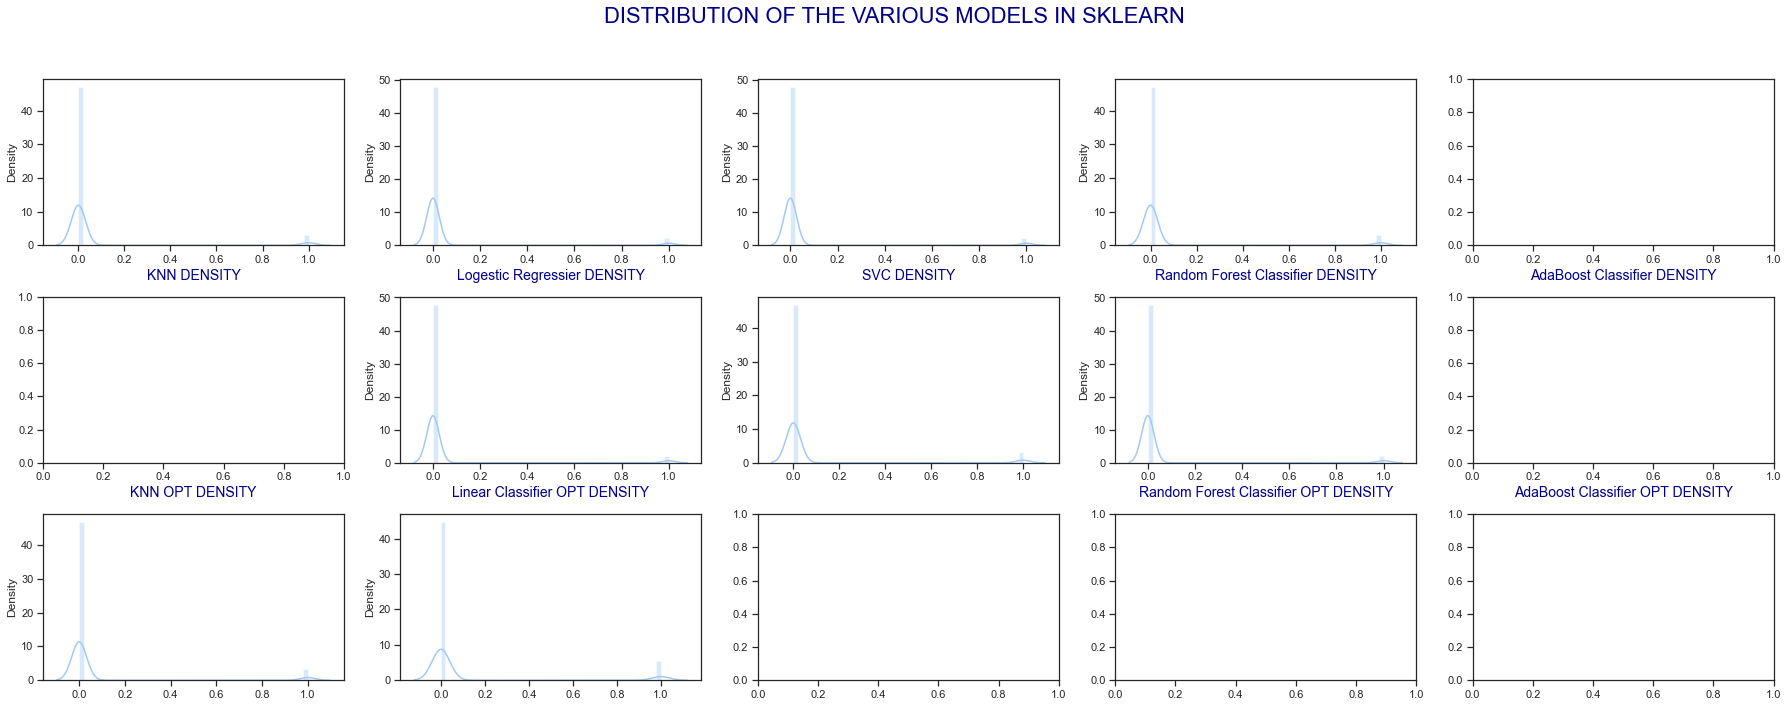

In [165]:
#Density-Plot and Box-Plot
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(nrows =3, ncols = 5, figsize = (25, 10))

sns.distplot((y_test,pred_knn), ax = ax[0,0])
ax[0,0].set_xlabel("KNN DENSITY", color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_log), ax = ax[0,1])
ax[0,1].set_xlabel('Logestic Regressier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_svc), ax = ax[0,2])
ax[0,2].set_xlabel('SVC DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rfc), ax = ax[0,3])
ax[0,3].set_xlabel('Random Forest Classifier DENSITY', color = "darkblue", fontsize = 14)

#sns.distplot((y_test,pred_dtree), ax = ax[0,4])
#ax[1,3].set_xlabel('Decision Tree Classifier DENSITY', color = "darkblue", fontsize = 14)

#sns.distplot((y_test,pred_ridge), ax = ax[1,0])
#ax[1,4].set_xlabel('Ridge Classifier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab), ax = ax[1,1])
ax[0,4].set_xlabel('AdaBoost Classifier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_knn_g), ax = ax[1,2])
ax[1,0].set_xlabel('KNN OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_log_g), ax = ax[1,3])
ax[1,1].set_xlabel('Linear Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

#sns.distplot((y_test,pred_svc_g), ax = ax[1,4])
#ax[1,2].set_xlabel('SVR OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rfo), ax = ax[2,0])
ax[1,3].set_xlabel('Random Forest Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab_o), ax = ax[2,1])
ax[1,4].set_xlabel('AdaBoost Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

#sns.distplot((y_test,pred_dtree_sgd), ax = ax[2,2])
#ax[1,3].set_xlabel('Decision Tree Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

#sns.distplot((y_test,pred_ridge_sgd), ax = ax[2,3])
#ax[1,4].set_xlabel('Ridge Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

fig.suptitle('DISTRIBUTION OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

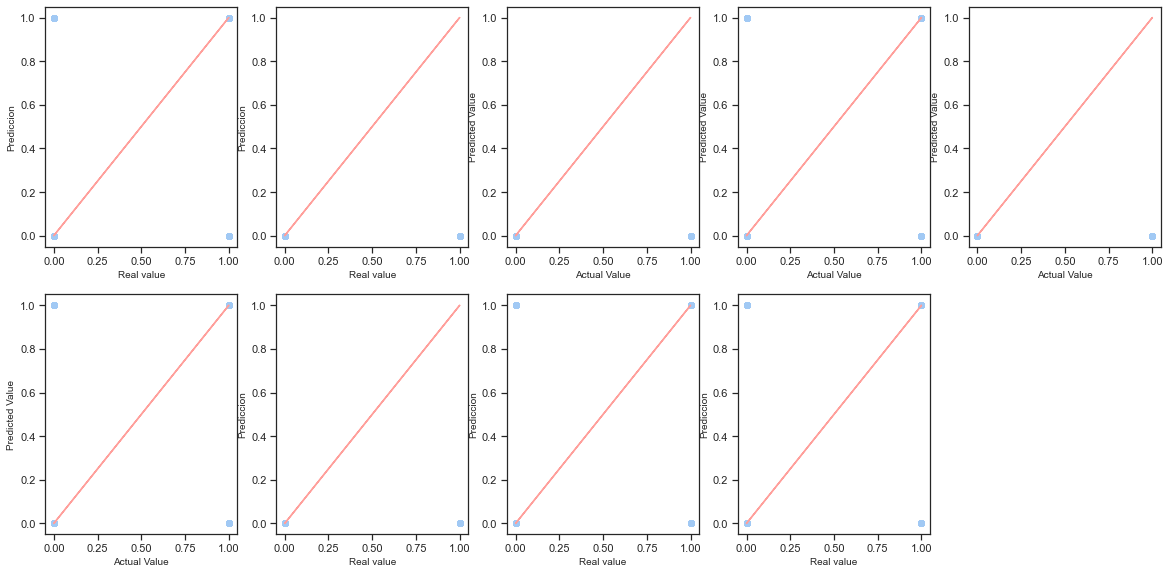

In [166]:
# PLOTTING THE PREDICTIONS
plt.rcParams['figure.figsize']= 20,15


plt.subplot(3,5,1)
plt.scatter(y_test,pred_knn)
plt.plot(y_test, y_test, 'r')
fig.suptitle('KNN', fontsize=20)
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,2)
plt.scatter(y_test,pred_log)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,3)
plt.scatter(y_test,pred_svc)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10) 

plt.subplot(3,5,4)
plt.scatter(y_test,pred_rfc)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10)  

plt.subplot(3,5,5)
plt.scatter(y_test,pred_adab)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10) 

#plt.subplot(3,5,6)
#plt.scatter(y_test,pred_dtree)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Actual Value')  
#plt.ylabel('Predicted Value')  

#plt.subplot(3,5,7)
#plt.scatter(y_test,pred_ridge)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Actual Value')  
#plt.ylabel('Predicted Value') 

plt.subplot(3,5,6)
plt.scatter(y_test,pred_knn_g)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10) 

plt.subplot(3,5,7)
plt.scatter(y_test,pred_log_g)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

#plt.subplot(3,5,10)
#plt.scatter(y_test,pred_svc_g)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Real value', fontsize = 10)  
#plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,8)
plt.scatter(y_test,pred_rfo)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,9)
plt.scatter(y_test,pred_adab_o)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

#plt.subplot(3,5,13)
#plt.scatter(y_test,pred_dtree_sgd)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Real value', fontsize = 10)  
#plt.ylabel('Prediccion', fontsize = 10) 

#plt.subplot(3,5,14)
#plt.scatter(y_test,pred_ridge_sgd)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Real value', fontsize = 10)  
#plt.ylabel('Prediccion', fontsize = 10) 

fig.suptitle('PREDICTIONS OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 8)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

## B. COMPARE ALL MODELS

In [167]:
print('Display Accuracy, Recall and Precision For Classification Models')
print('--------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------------')
print('*********************************...........INFERENCE AND CONCLUSION.............**************************************')
print('-----------------------------------------------------------------------------------------------------------------------')
results_df = append_results("KNN", knn, results_df, y_test, pred_knn)
results_df = append_results("Logestic Regression", log_reg, results_df, y_test, pred_log)
#results_df = append_results("SVC", svc, results_df, y_test, pred_svc)
results_df = append_results("Random Forest", rfc, results_df, y_test, pred_rfc)
results_df = append_results("Ada Boost", adab, results_df, y_test, pred_adab)
results_df = append_results("KNN_opt", grid_model, results_df, y_test, pred_knn_g)
results_df = append_results("LogesticRegression_opt", grid_model2, results_df, y_test, pred_log_g)
#results_df = append_results("SVC_opt", grid_model3, results_df, y_test, pred_svc_g)
results_df = append_results("Random Forest_opt", grid_model4, results_df, y_test, pred_rfo)
results_df = append_results("Ada Boost_opt", grid_model5, results_df, y_test, pred_adab_o)
results_df

Display Accuracy, Recall and Precision For Classification Models
--------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------
*********************************...........INFERENCE AND CONCLUSION.............**************************************
-----------------------------------------------------------------------------------------------------------------------


,Model,Cross Val Score,pre_macro,recall_macro,f1_macro,f1_macro_manual
0,KNN,0.767236,0.616782,0.655187,0.655187,0.906950
1,Logestic Regression,0.457063,0.500000,0.477568,0.477568,0.915269
2,Random Forest,0.818573,0.635929,0.682572,0.682572,0.869755
3,Ada Boost,0.457063,0.500000,0.477568,0.477568,0.915269
4,KNN_opt,0.811550,0.640814,0.686717,0.686717,0.907584
5,LogesticRegression_opt,0.457063,0.500000,0.477568,0.477568,0.915269
6,Random Forest_opt,0.502964,0.501682,0.499041,0.499041,0.914278
7,Ada Boost_opt,0.505503,0.507813,0.504127,0.504127,0.879618


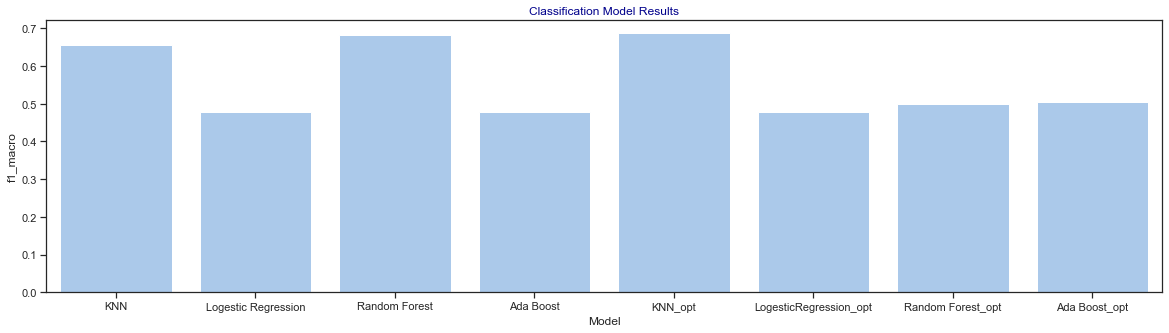

In [168]:
plt.rcParams['figure.figsize'] = 20,5
g = sns.barplot("Model","f1_macro", data = results_df, color = 'b')
g.set_title("Classification Model Results", color = "darkblue")
plt.show()

In [169]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             ["XGB", XGBClassifier()],
             ["CatBoost", CatBoostClassifier(logging_level='Silent')]  
]

In [170]:
df_id = df['ImtId']
#df_id.shape

In [171]:
pred_X = X
#pred_X.shape

In [172]:
df_NctId_M = df['NctId']
df_ImtId_M = df['ImtId']
#df_CreateDate_M = df['CreateDate']
df_RuleName_M = df['RuleName'] 
df_RootCause_M = df['RootCause'] 
df_Resolution_M =df['Resolution'] 
df_RecoveryPrime_M = df['RecoveryPrime']
df_PlatformLeft_M = df['PlatformLeft'] 
df_ServiceImpactLeft_M = df['ServiceImpactLeft'] 
df_Site_M = df['Site'] 
df_SiteId_M = df['SiteId'] 
df_NetworkImpactRight_M =df['NetworkImpactRight'] 
df_NetworkImpact1_M = df['NetworkImpact1']
df_Platform_1_M = df['Platform.1']
#df_Bot_M = df['Bot']
#df_AutomationSuiteName_M = df['AutomationSuiteName']
#df_AutomationStatus_M = df['AutomationStatus'] 
#df_AutomationFramework_M = df['AutomationFramework']
df_Element_M = df['Element']

df_id = df["ImtId"].tail(100)
df_id.shape

In [173]:
pred_rfc = pd.Series(pred_rfc)

In [174]:
df_ImtId_M = df['ImtId']

In [175]:
pred_rfc = pd.Series(pred_rfc)
pred_rfc

0        0
1        0
2        0
3        0
4        0
        ..
12618    0
12619    0
12620    0
12621    0
12622    0
Length: 12623, dtype: int32

In [176]:
pred_knn_g = pd.Series(pred_knn_g)
pred_knn_g

0        0
1        0
2        0
3        0
4        0
        ..
12618    0
12619    0
12620    0
12621    0
12622    0
Length: 12623, dtype: int32

In [177]:
predDfknn = pd.DataFrame({ "df_RootCause_M":pred_knn_g})
predDfknn.value_counts()

df_RootCause_M
0                 12158
1                   465
dtype: int64

In [178]:
predDf = pd.DataFrame({ "df_RootCause_M":pred_rfc})
predDf.value_counts()

df_RootCause_M
0                 12185
1                   438
dtype: int64

In [179]:
#drop_duplicates index
df = df[~df.index.duplicated()]

In [180]:
##Original Data Set
RootCause_M = df['RootCause'] 
Resolution_M =df['Resolution'] 

In [181]:
#Original Data Set
Df_Resolution = pd.DataFrame({'Resolution_M':df['Resolution'], 'RootCause_M': df['RootCause'] })
Df_Count_Resolution = Df_Resolution.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Root Cause vs Resolution: \n", Df_Resolution)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Root Cause vs Resolution:  \n", Df_Count_Resolution)

-------------------------------------------------------------------------------------------------------------------
Root Cause vs Resolution: 
            Resolution_M  RootCause_M
0     See Linked ticket            0
1     See Linked ticket            0
2     See Linked ticket            1
3     See Linked ticket            1
4     See Linked ticket            0
...                 ...          ...
2566            Unknown            0
2567  See Linked ticket            0
2568  See Linked ticket            0
2569           Replaced            0
2570           Replaced            0

[2571 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Root Cause vs Resolution:  
 Resolution_M                    RootCause_M
Network / Service Validated     0              483
See Linked ticket               0              445
Hydro Restored                  0              384
Repaired                        0            

In [182]:
#pred_knn_g
predDf_Resolution = pd.DataFrame({'df_Resolution_M':df['Resolution'], 'df_RootCause_M':pred_knn_g})
predDf_Count_Resolution = predDf_Resolution.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs Resolution: \n", predDf_Resolution)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs Resolution:  \n", predDf_Count_Resolution)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs Resolution: 
          df_Resolution_M  df_RootCause_M
0      See Linked ticket               0
1      See Linked ticket               0
2      See Linked ticket               0
3      See Linked ticket               0
4      See Linked ticket               0
...                  ...             ...
12618                NaN               0
12619                NaN               0
12620                NaN               0
12621                NaN               0
12622                NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs Resolution:  
 df_Resolution_M                 df_RootCause_M
See Linked ticket               0                 539
Network / Service Validated     0                 523
Hydr

In [183]:
predDf_Resolution = pd.DataFrame({'df_Resolution_M':df['Resolution'], 'df_RootCause_M':pred_rfc})
predDf_Count_Resolution = predDf_Resolution.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs Resolution: \n", predDf_Resolution)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs Resolution:  \n", predDf_Count_Resolution)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs Resolution: 
          df_Resolution_M  df_RootCause_M
0      See Linked ticket               0
1      See Linked ticket               0
2      See Linked ticket               0
3      See Linked ticket               0
4      See Linked ticket               0
...                  ...             ...
12618                NaN               0
12619                NaN               0
12620                NaN               0
12621                NaN               0
12622                NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs Resolution:  
 df_Resolution_M                 df_RootCause_M
See Linked ticket               0                 539
Network / Service Validated     0                 527
Hydr

In [184]:
predDf_RuleName= pd.DataFrame({'df_RuleName_M':df['RuleName'], 'df_RootCause_M':pred_rfc})
predDf_Count_RuleName = predDf_RuleName.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs Rule Name: \n", predDf_RuleName)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs Rule Name:  \n", predDf_Count_RuleName)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs Rule Name: 
        df_RuleName_M  df_RootCause_M
0                1.0               0
1                1.0               0
2                1.0               0
3                1.0               0
4                1.0               0
...              ...             ...
12618            NaN               0
12619            NaN               0
12620            NaN               0
12621            NaN               0
12622            NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs Rule Name:  
 df_RuleName_M  df_RootCause_M
1.0            0                 2481
               1                   90
dtype: int64


In [185]:
predDf_RecoveryPrime = pd.DataFrame({'df_RecoveryPrime_M':df['RecoveryPrime'], 'df_RootCause_M':pred_rfc})
predDf_Count_RecoveryPrime = predDf_RecoveryPrime.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs Recovery Prime: \n", predDf_RecoveryPrime)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs Recovery Prime:  \n", predDf_Count_RecoveryPrime)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs Recovery Prime: 
       df_RecoveryPrime_M  df_RootCause_M
0                Unknown               0
1                Unknown               0
2           TAC Resolved               0
3           TAC Resolved               0
4                Unknown               0
...                  ...             ...
12618                NaN               0
12619                NaN               0
12620                NaN               0
12621                NaN               0
12622                NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs Recovery Prime:  
 df_RecoveryPrime_M       df_RootCause_M
Field Resolved           0                 828
Unknown                  0                 685
NOC Resolved     

In [186]:
predDf_ImtId = pd.DataFrame({'df_ImtID_M':df['ImtId'], 'df_RootCause_M':pred_rfc})
predDf_Count_ImtId = predDf_ImtId.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs Imt Id: \n", predDf_ImtId)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs Imt ID:  \n", predDf_Count_ImtId)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs Imt Id: 
             df_ImtID_M  df_RootCause_M
0      IMT.2205.012621               0
1      IMT.2205.012621               0
2      IMT.2205.012683               0
3      IMT.2205.012683               0
4      IMT.2205.012688               0
...                ...             ...
12618              NaN               0
12619              NaN               0
12620              NaN               0
12621              NaN               0
12622              NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs Imt ID:  
 df_ImtID_M       df_RootCause_M
IMT.2205.027120  0                 214
IMT.2205.018361  0                 102
IMT.2205.020962  0                  93
IMT.2205.033445  0                  68
IMT

In [187]:
predDf_NctId = pd.DataFrame({'df_NctID_M':df['NctId'], 'df_RootCause_M':pred_rfc})
predDf_Count_NctId = predDf_NctId.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs Nct Id: \n", predDf_NctId)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs Nct ID:  \n", predDf_Count_NctId)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs Nct Id: 
             df_NctID_M  df_RootCause_M
0      NCT.2205.006487               0
1      NCT.2205.006487               0
2      NCT.2205.006487               0
3      NCT.2205.006487               0
4      NCT.2205.006487               0
...                ...             ...
12618              NaN               0
12619              NaN               0
12620              NaN               0
12621              NaN               0
12622              NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs Nct ID:  
 df_NctID_M       df_RootCause_M
NCT.2205.006487  0                 2104
Unknown          0                  374
NCT.2205.006487  1                   74
Unknown          1                   16

In [188]:
df_NctId_M = df['NctId']
df_ImtId_M = df['ImtId']
#df_CreateDate_M = df['CreateDate']
df_RuleName_M = df['RuleName'] 
df_RootCause_M = df['RootCause'] 
df_Resolution_M =df['Resolution'] 
df_RecoveryPrime_M = df['RecoveryPrime']
df_PlatformLeft_M = df['PlatformLeft'] 
df_ServiceImpactLeft_M = df['ServiceImpactLeft'] 
df_Site_M = df['Site'] 
df_SiteId_M = df['SiteId'] 
df_NetworkImpactRight_M =df['NetworkImpactRight'] 
df_NetworkImpact1_M = df['NetworkImpact1']
df_Platform_1_M = df['Platform.1']
#df_Bot_M = df['Bot']
#df_AutomationSuiteName_M = df['AutomationSuiteName']
#df_AutomationStatus_M = df['AutomationStatus'] 
#df_AutomationFramework_M = df['AutomationFramework']
df_Element_M = df['Element']

In [189]:
predDf_PlatformLeft = pd.DataFrame({'df_PlatformLeft_M':df['PlatformLeft'], 'df_RootCause_M':pred_rfc})
predDf_Count_PlatformLeft = predDf_PlatformLeft.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs PlatformLeft: \n", predDf_PlatformLeft)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs PlatformLeft:  \n", predDf_Count_PlatformLeft)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs PlatformLeft: 
              df_PlatformLeft_M  df_RootCause_M
0      Data and Voice Services               0
1      Data and Voice Services               0
2                    Core Data               0
3                    Core Data               0
4      Data and Voice Services               0
...                        ...             ...
12618                      NaN               0
12619                      NaN               0
12620                      NaN               0
12621                      NaN               0
12622                      NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs PlatformLeft:  
 df_PlatformLeft_M        df_RootCause_M
Radio                    0                 

In [190]:
predDf_Site = pd.DataFrame({'df_Site_M':df['Site'], 'df_RootCause_M':pred_rfc})
predDf_Count_Site = predDf_Site.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs Site: \n", predDf_Site)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs Site:  \n", predDf_Count_Site)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs Site: 
       df_Site_M  df_RootCause_M
0       Unknown               0
1       Unknown               0
2       Unknown               0
3       Unknown               0
4       Unknown               0
...         ...             ...
12618       NaN               0
12619       NaN               0
12620       NaN               0
12621       NaN               0
12622       NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs Site:  
 df_Site_M  df_RootCause_M
Unknown    0                 2478
           1                   90
YORKMILLS  0                    2
NATIONAL   0                    1
dtype: int64


In [191]:
predDf_SiteId = pd.DataFrame({'df_SiteId_M':df['SiteId'], 'df_RootCause_M':pred_rfc})
predDf_Count_SiteId = predDf_SiteId.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs SiteId: \n", predDf_SiteId)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs SiteId:  \n", predDf_Count_SiteId)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs SiteId: 
       df_SiteId_M  df_RootCause_M
0         Unknown               0
1         Unknown               0
2             ---               0
3             ---               0
4         Unknown               0
...           ...             ...
12618         NaN               0
12619         NaN               0
12620         NaN               0
12621         NaN               0
12622         NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs SiteId:  
 df_SiteId_M  df_RootCause_M
---          0                 454
Unknown      0                 348
W1991        0                  56
W3032        0                  54
W1947        0                  54
                              ... 
PG07         

In [192]:
predDf_NetworkImpactRight = pd.DataFrame({'df_NetworkImpactRight_M':df['NetworkImpactRight'], 'df_RootCause_M':pred_rfc})
predDf_Count_NetworkImpactRight = predDf_NetworkImpactRight.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs NetworkImpactRight: \n", predDf_NetworkImpactRight)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs NetworkImpactRight:  \n", predDf_Count_NetworkImpactRight)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs NetworkImpactRight: 
       df_NetworkImpactRight_M  df_RootCause_M
0                     Unknown               0
1                     Unknown               0
2                     Unknown               0
3                     Unknown               0
4                     Unknown               0
...                       ...             ...
12618                     NaN               0
12619                     NaN               0
12620                     NaN               0
12621                     NaN               0
12622                     NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs NetworkImpactRight:  
 df_NetworkImpactRight_M  df_RootCause_M
Unknown                  0                 

In [193]:
predDf_NetworkImpact1 = pd.DataFrame({'df_NetworkImpact1_M':df['NetworkImpact1'], 'df_RootCause_M':pred_rfc})
predDf_Count_NetworkImpact1 = predDf_NetworkImpact1.value_counts()
print('-------------------------------------------------------------------------------------------------------------------')
print ("Prediction of Root Cause vs NetworkImpact1: \n", predDf_NetworkImpact1)
print('-------------------------------------------------------------------------------------------------------------------')
print ("Count Prediction of Root Cause vs NetworkImpact1:  \n", predDf_Count_NetworkImpact1)

-------------------------------------------------------------------------------------------------------------------
Prediction of Root Cause vs NetworkImpact1: 
       df_NetworkImpact1_M  df_RootCause_M
0                    None               0
1                    None               0
2              Threatened               0
3              Threatened               0
4                    None               0
...                   ...             ...
12618                 NaN               0
12619                 NaN               0
12620                 NaN               0
12621                 NaN               0
12622                 NaN               0

[12623 rows x 2 columns]
-------------------------------------------------------------------------------------------------------------------
Count Prediction of Root Cause vs NetworkImpact1:  
 df_NetworkImpact1_M  df_RootCause_M
None                 0                 787
Threatened           0                 681
Degraded         

predDf = pd.DataFrame({'Responsibility_NUM':df_Responsibility_M, 'RootCause_NUM':pred_y})
predDf

predDf = pd.DataFrame({'Bot_NUM':df_Bot_M, 'RootCause_NUM':pred_y})
predDf

In [194]:
predDf_Resolution.sort_values(by="df_RootCause_M", ascending=False).head()

,df_Resolution_M,df_RootCause_M
2877,NaN,1
12107,NaN,1
1356,Repaired,1
1355,Network / Service Validated,1
6928,NaN,1


In [195]:
predDf_RuleName.sort_values(by="df_RootCause_M", ascending=False).head()

,df_RuleName_M,df_RootCause_M
2877,NaN,1
12107,NaN,1
1356,1.0,1
1355,1.0,1
6928,NaN,1


In [196]:
predDf_RecoveryPrime.sort_values(by="df_RootCause_M", ascending=False).head()

,df_RecoveryPrime_M,df_RootCause_M
2877,NaN,1
12107,NaN,1
1356,Field Resolved,1
1355,NOC Resolved,1
6928,NaN,1


In [197]:
predDf_PlatformLeft.sort_values(by="df_RootCause_M", ascending=False).head()

,df_PlatformLeft_M,df_RootCause_M
2877,NaN,1
12107,NaN,1
1356,Wireline Access,1
1355,Core Data,1
6928,NaN,1


In [198]:
predDf_NetworkImpactRight.sort_values(by="df_RootCause_M", ascending=False).head()

,df_NetworkImpactRight_M,df_RootCause_M
2877,NaN,1
12107,NaN,1
1356,Unknown,1
1355,Unknown,1
6928,NaN,1


In [199]:
predDf_NetworkImpact1.sort_values(by="df_RootCause_M", ascending=False).head()

,df_NetworkImpact1_M,df_RootCause_M
2877,NaN,1
12107,NaN,1
1356,Degraded,1
1355,Threatened,1
6928,NaN,1


In [200]:
g = predDf_RuleName.groupby('df_RuleName_M')['df_RootCause_M']
predDf_RuleName = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (predDf_RuleName)

                              counts  percentage
df_RuleName_M df_RootCause_M                    
1.0           0                 2481   96.499417
              1                   90    3.500583


In [201]:
df2 = predDf_RuleName.reset_index().groupby(['df_RuleName_M', 'df_RootCause_M']).size().to_frame('count')
df2['percentage'] = df2['count'].div(df2.groupby('df_RuleName_M')['count'].transform('sum')).mul(100)
print (df2)

                              count  percentage
df_RuleName_M df_RootCause_M                   
1.0           0                   1        50.0
              1                   1        50.0


############################################################################################################################

![image.png](attachment:image.png)

############################################################################################################################

In [202]:
import pandas as pd
from scipy import stats

###### Creating a contingency table

###### Showing row percentages

###### Chi-squared test of independence

In [203]:
predDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12623 entries, 0 to 12622
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   df_RootCause_M  12623 non-null  int32
dtypes: int32(1)
memory usage: 49.4 KB


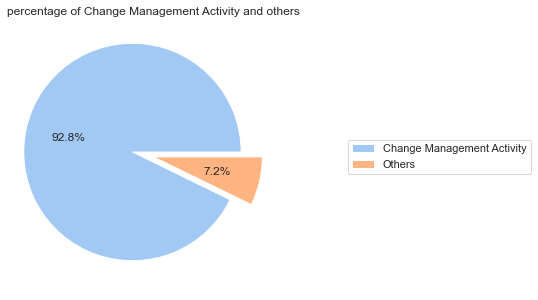

In [204]:
plt.rcParams['figure.figsize']=(5,5)
explode = (.2, 0)
plt.pie(df['RootCause'].value_counts(), explode = explode, autopct='%1.1f%%')
plt.title('percentage of Change Management Activity and others')
plt.legend(['Change Management Activity', 'Others'],loc=6,borderaxespad=30)


plt.show( )

In [205]:
pd.crosstab([df['RootCause'], df['Bot']], df['Responsibility'])

KeyError: 'Bot'

In [ ]:
predDf

In [ ]:
print('no. of Change Management Activity')
df[df['RootCause']==0][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

In [ ]:
plt.rcParams['figure.figsize']=15,7
plt.style.use('ggplot')
weights=pd.Series(log_reg.coef_[0], index=['ImtId_NUM', 'RuleName_NUM', 'RootCause_NUM',
       'Resolution_NUM', 'RecoveryPrime_NUM', 'WorkflowState_NUM',
       'Responsibility_NUM', 'ResponsibilityDepartment_NUM', 'State_NUM',
       'Status_NUM', 'Submitter_NUM', 'SubmitterDepartment_NUM', 'Bot_NUM',
       'AutomationSuiteName_NUM', 'AutomationStatus_NUM',
       'AutomationFramework_NUM'])

params_weight =weights.plot(kind='bar', title='feature going to help us for successfull Change Management Activity ')
fig=params_weight.get_figure()
plt.show()

In [ ]:
#***************************************************************************************************************************

In [ ]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [ ]:
f_p_values

In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

In [ ]:
p_values.sort_index(ascending=False)

In [ ]:
#importing the libraries

import pandas as pd
from sklearn.preprocessing import normalize

In [ ]:
normalize = normalize(X)

In [ ]:
data_scaled = pd.DataFrame(normalize)
data_scaled.var()

In [ ]:
#storing the variance and name of variables

variance = data_scaled.var()
columns = data.columns

In [ ]:
#saving the names of variables having variance more than a threshold value

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold as 1%
        variable.append(columns[i])

In [ ]:
variable

In [ ]:
# creating a new dataframe using the above variables
new_data = data[variable]

# first five rows of the new data
new_data.head()

In [ ]:
# last five rows of the new data
new_data.tail()

In [ ]:
#variance of variables in new data
new_data.var()

In [ ]:
# shape of new and original data
new_data.shape, df.shape

In [ ]:
# DATA PREPROCESSING - Scaling Data

#standardizing all the columns
sc=StandardScaler()
scaled=sc.fit_transform(X)

#converted to dataframe to work easily on columns
X_scaled=pd.DataFrame(scaled, columns=X.columns)
#print(data)

In [ ]:
from sklearn.preprocessing import StandardScaler

#to_scale=df_cln.select_dtypes(include='number').columns.tolist()[1:-1]
sc=StandardScaler()
scaled=sc.fit_transform(X)
x_scl=pd.DataFrame(scaled, columns=X.columns)

In [ ]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scl, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

In [ ]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

In [ ]:
LR.score(X_test, y_test)

In [ ]:
y_pred_LR=LR.predict(X_test)

In [ ]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Change Management Activity', 'Others']); ax.yaxis.set_ticklabels(['Change Management Activity', 'Others']);

In [ ]:
fpr, tpr, thres = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [ ]:
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
RF =RandomForestClassifier()
RF.fit(X_train, y_train)

In [ ]:
RF.score(X_test, y_test)

In [ ]:
y_pred_RF=RF.predict(X_test)

In [ ]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Change Management Activity', 'Others']); ax.yaxis.set_ticklabels(['Change Management Activity', 'Others']);

In [ ]:
fpr, tpr, thres = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [ ]:
plt.rcParams['figure.figsize']=5,5
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

###### Selecting most helping Parametes

In [ ]:
X.columns

In [ ]:
plt.rcParams['figure.figsize']=15,7
plt.style.use('ggplot')
weights=pd.Series(LR.coef_[0], index=['ImtId_NUM', 'RuleName_NUM', 'RootCause_NUM',
       'Resolution_NUM', 'RecoveryPrime_NUM', 'WorkflowState_NUM',
       'Responsibility_NUM', 'ResponsibilityDepartment_NUM', 'State_NUM',
       'Status_NUM', 'Submitter_NUM', 'SubmitterDepartment_NUM', 'Bot_NUM',
       'AutomationSuiteName_NUM', 'AutomationStatus_NUM',
       'AutomationFramework_NUM'])

params_weight =weights.plot(kind='bar', title='feature going to help us for successfull Change Management Activity ')
fig=params_weight.get_figure()
plt.show()

###### Parameters that impact on Change Managment Activity:

-State

-WorkflowState

-Resolution

-Create Date

-Submitter

-Recovery Prime

-Responsibility Department

-Automation Suite Name

-Bot

-Responsibility

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             ["XGB", XGBClassifier()],
             ["CatBoost", CatBoostClassifier(logging_level='Silent')]  
]

In [ ]:
from sklearn.ensemble import RandomForestClassifier          # 
from sklearn.svm import SVC, LinearSVC                       # 
from sklearn.linear_model import LogisticRegression          #
from sklearn.neighbors import KNeighborsClassifier           # KNN
from sklearn.naive_bayes import GaussianNB                   # 
from sklearn.tree import DecisionTreeClassifier              # 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier     

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

get_ipython().magic('matplotlib inline')

In [ ]:
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier=classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1 =f1_score(y_test,y_pred)
    class_eva=pd.DataFrame([recall,precision,f1])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

In [ ]:
names=pd.DataFrame(names)
names=names[0].tolist()
names

In [ ]:
names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=["recall","precision","F1"]
result

pred_X = df.tail(100)